## Проект: Линейные модели в машинном обучении

Описание проекта:
Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!
Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке.

Цель проекта:
создать две прогнозные модели для отбора бурёнок в поголовье:

    Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
    Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

С помощью модели нужно отобрать коров по двум критериям:

    средний удой за год — не менее 6000 килограммов;
    молоко должно быть вкусным.
Задачи:<br>
1) Предобработать данные<br>
2) Провести исследовательский анализ данных<br>
3) Провести корреляционный анализ признаков<br>
4) Обучить 3 модели линейной регрессии для решения задачи регрессии и проанализировать их качество<br>
5) Обучить 1 модель логистической регрессии для решения задачи классификации<br>
6) Сделать итоговые выводы

Описание входных данных:<br>
Таблица `ferma_main` содержит данные о стаде фермера на текущий момент:<br>
    `id` — уникальный идентификатор коровы.<br>
    `Удой, кг` — масса молока, которую корова даёт в год (в килограммах).<br>
    `ЭКЕ` (Энергетическая кормовая единица) — показатель питательности корма коровы.<br>
    `Сырой протеин, г` — содержание сырого протеина в корме (в граммах).<br>
    `СПО` (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.<br>
    `Порода` — порода коровы.<br>
    `Тип пастбища` — ландшафт лугов, на которых паслась корова.<br>
    `порода папы_быка` — порода папы коровы.<br>
    `Жирность,%` — содержание жиров в молоке (в процентах).<br>
    `Белок,%` — содержание белков в молоке (в процентах).<br>
    `Вкус молока` — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).<br>
    `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).<br><br>
Таблица `ferma_dad` хранит имя папы каждой коровы в стаде фермера:<br>
    `id` — уникальный идентификатор коровы.<br>
    `Имя Папы` — имя папы коровы.<br><br>
Таблица `cow_buy` это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой:<br>
    `Порода` — порода коровы.<br>
    `Тип пастбища` — ландшафт лугов, на которых паслась корова.<br>
    `порода папы_быка` — порода папы коровы.<br>
    `Имя_папы` — имя папы коровы.<br>
    `Текущая_жирность,%` — содержание жиров в молоке (в процентах).<br>
    `Текущий_уровень_белок,%` — содержание белков в молоке (в процентах).<br>
    `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).<br>


## Загрузка данных

In [1]:
# Загрузим необходимые библиотеки
!pip install phik
!pip install shap
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import phik
from sklearn.model_selection import train_test_split 
import copy
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    r2_score, mean_absolute_error,
    mean_squared_error, confusion_matrix,
    recall_score, precision_score,
    accuracy_score
)
from scipy import stats
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import phik
import shap


     |████████████████████████████████| 679 kB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 533 kB 2.6 MB/s eta 0:00:01


In [2]:
ferma_main_df=pd.read_csv('/datasets/ferma_main.csv', sep=";", decimal=',', parse_dates=True)
display(ferma_main_df.head())
print('Размер датасета: ',ferma_main_df.shape)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


Размер датасета:  (634, 12)


In [3]:
ferma_dad_df=pd.read_csv('/datasets/ferma_dad.csv', sep=";",decimal=',', parse_dates=True)
display(ferma_dad_df.head())
print('Размер датасета: ',ferma_dad_df.shape)

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


Размер датасета:  (629, 2)


Размер второго датасета меньше, значит для некоторых коров отсутствует информация об отце

In [4]:
cow_buy_df=pd.read_csv('/datasets/cow_buy.csv', sep=";",decimal=',', parse_dates=True)
cow_buy_df

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


Как и было сказано в описании, у коров, которые фермер рассматривает к покупке, отсутствует информация о некоторых признаках.

##  Предобработка данных

In [5]:
#Удалим дубликаты, если имеются
print(ferma_main_df.duplicated().sum())
print(ferma_dad_df.duplicated().sum())
ferma_main_df=ferma_main_df.drop_duplicates()
ferma_dad_df=ferma_dad_df.drop_duplicates()
print()

5
0


In [6]:
# Выведем основную информацию по таблицам
print(ferma_main_df.info())
print(ferma_dad_df.info())
print(cow_buy_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     629 non-null    int64  
 1   Удой, кг                               629 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  629 non-null    float64
 3   Сырой протеин, г                       629 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   629 non-null    float64
 5   Порода                                 629 non-null    object 
 6   Тип пастбища                           629 non-null    object 
 7   порода папы_быка                       629 non-null    object 
 8   Жирность,%                             629 non-null    float64
 9   Белок,%                                629 non-null    float64
 10  Вкус молока                            629 non-null    object 
 11  Возрас

Типы данных не треубуют обработки, все верно

In [7]:
# Посмотрим, есть ли неявные дубликаты
ferma_main_df['Порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [8]:
cow_buy_df['Порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [9]:
ferma_main_df['Тип пастбища'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [10]:
cow_buy_df['Тип пастбища'].unique()

array(['холмистое', 'равнинное'], dtype=object)

In [11]:
# устраним неявные дубликаты
ferma_main_df['Тип пастбища']=ferma_main_df['Тип пастбища'].replace({'Равнинные':'равнинное', 'Равнинное':'равнинное','Холмистое':'холмистое'})

In [12]:
ferma_main_df['порода папы_быка'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [13]:
cow_buy_df['порода папы_быка'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [14]:
# устраним неявные дубликаты
ferma_main_df['порода папы_быка']=ferma_main_df['порода папы_быка'].replace({'Айдиалл':'Айдиал'})

In [15]:
ferma_main_df['Вкус молока'].unique()

array(['вкусно', 'не вкусно'], dtype=object)

In [16]:
ferma_main_df['Возраст'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

In [17]:
cow_buy_df['Возраст'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

In [18]:
# заменим
ferma_main_df['Возраст']=ferma_main_df['Возраст'].replace({'более_2_лет':'>2', 'менее_2_лет':'<2'})

In [19]:
# заменим
cow_buy_df['Возраст']=cow_buy_df['Возраст'].replace({'более_2_лет':'>2', 'менее_2_лет':'<2'})

In [20]:
ferma_dad_df['Имя Папы'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

In [21]:
cow_buy_df['Имя_папы'].unique()

array(['Геркулес', 'Буйный', 'Барин', 'Соловчик'], dtype=object)

In [22]:
#Надо перевести все в нижний регистр 
#создадим функцию
def to_lower(value):
    if isinstance(value, str):
        return value.lower()
    return value
ferma_main_df=ferma_main_df.applymap(to_lower)
ferma_dad_df=ferma_dad_df.applymap(to_lower)
cow_buy_df=cow_buy_df.applymap(to_lower)

In [23]:
# приведем название столбцов к единому стилю
ferma_main_df=ferma_main_df.rename(columns={'порода папы_быка':'Порода папы_быка','Имя Папы':'Имя папы'})
ferma_dad_df=ferma_dad_df.rename(columns={'Имя Папы':'Имя папы'})
cow_buy_df=cow_buy_df.rename(columns={'порода папы_быка':'Порода папы_быка','Имя_папы':'Имя папы','Текущая_жирность,%':'Жирность,%','Текущий_уровень_белок,%':'Белок,%'})

In [24]:
ferma_main_df.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,Порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,>2
1,2,5529,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,<2
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не вкусно,>2
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не вкусно,>2
4,5,5302,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,<2


In [25]:
ferma_dad_df.head()

,id,Имя папы
0,1,буйный
1,2,соловчик
2,3,барин
3,4,буйный
4,5,барин


In [26]:
cow_buy_df.head()

,Порода,Тип пастбища,Порода папы_быка,Имя папы,"Жирность,%","Белок,%",Возраст
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,>2
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,<2
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,>2
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,>2
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,>2


**Вывод:** Были предобработаны входные данные: названия столбцов, значения приведены к единому виду, устранеы дубликаты. 

## Исследовательский анализ данных

In [27]:
# посмотрим на описание данных
ferma_main_df.describe()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),"Жирность,%","Белок,%"
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


In [28]:
# создадим функцию для визуализации данных
def visualize_dataframe_columns(dataframe):
    for column in dataframe.columns:
        if column=='id':
            continue
        column_data = dataframe[column]
        
        # Determine plot type based on data type
        plot_type = 'bar' if pd.api.types.is_string_dtype(column_data) else 'both'

        # Create subplots
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        if plot_type=='bar':
            axes[0].set_title(f'Bar - {column}')
            axes[0].bar(x=column_data.unique(), color='yellow', edgecolor='black', height=column_data.value_counts())
        else:
            axes[0].set_title(f'Histogram - {column}')
            axes[0].hist(column_data, bins=20, color='skyblue', edgecolor='black')
        axes[0].set_xlabel(column)
        axes[0].set_ylabel('Frequency')

        # Plot boxplot (if not a string column)
        if plot_type == 'both':
            axes[1].set_title(f'Boxplot - {column}')
            axes[1].boxplot(column_data, vert=False)
            axes[1].set_xlabel(column)

        plt.tight_layout()
        plt.show()


# Example usage:
# Assuming 'df' is your DataFrame
# visualize_columns(df)


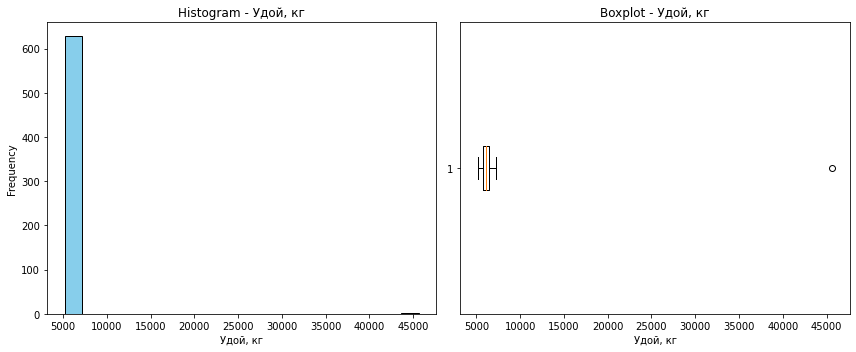

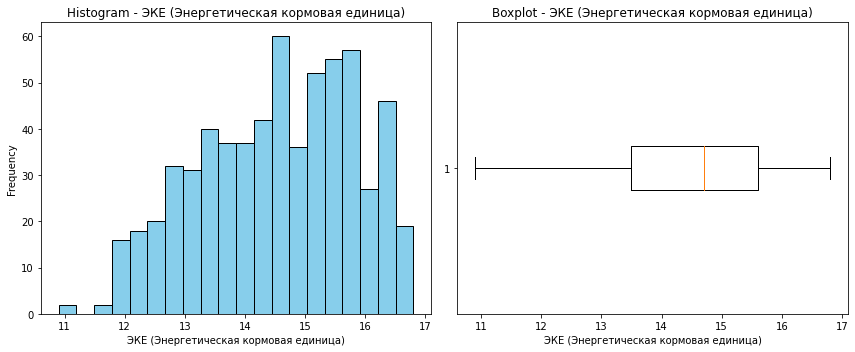

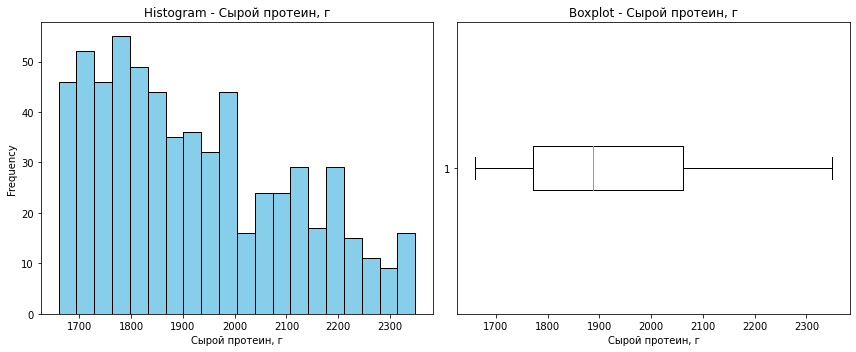

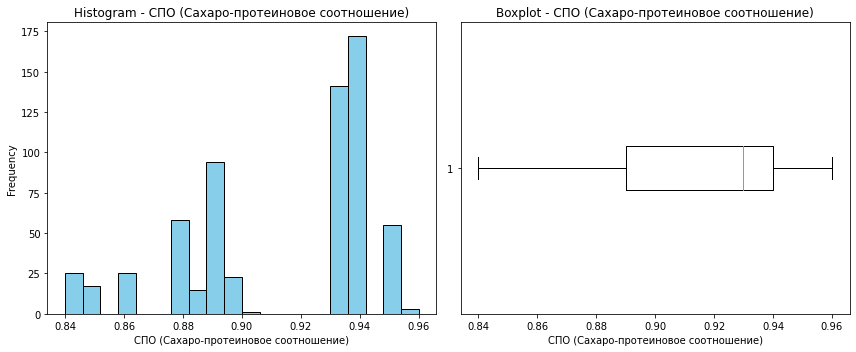

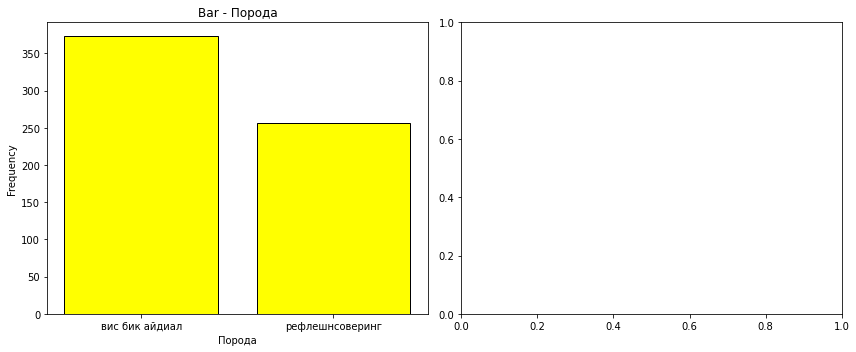

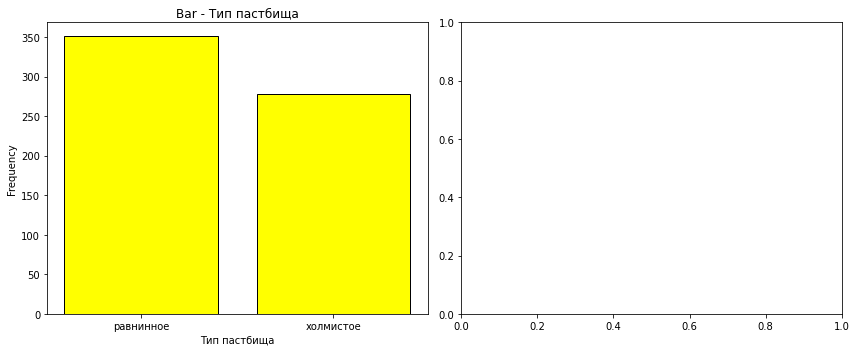

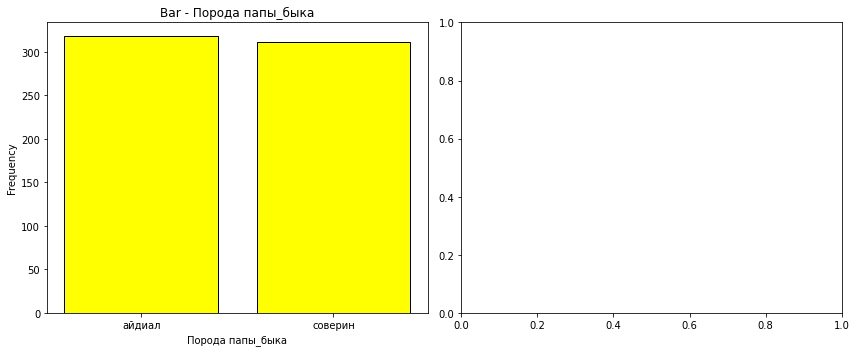

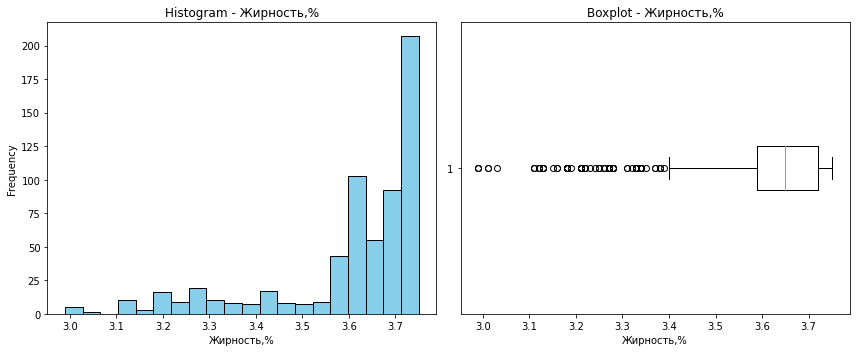

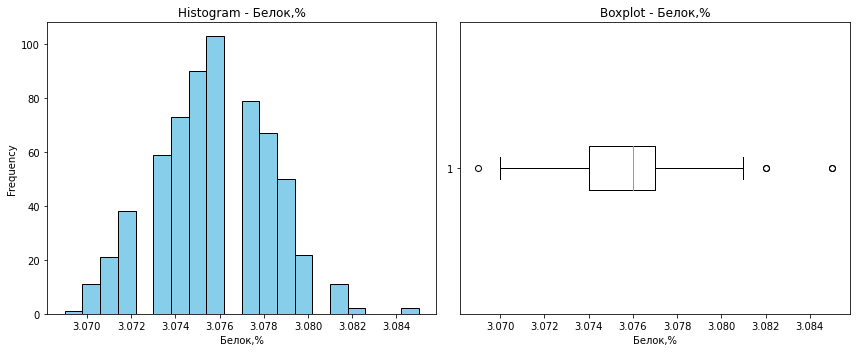

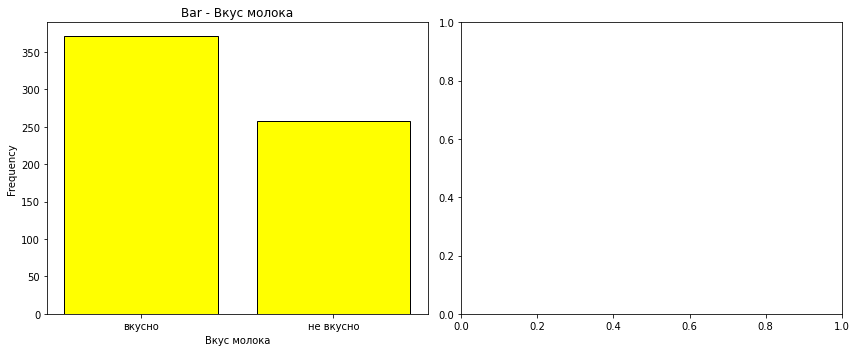

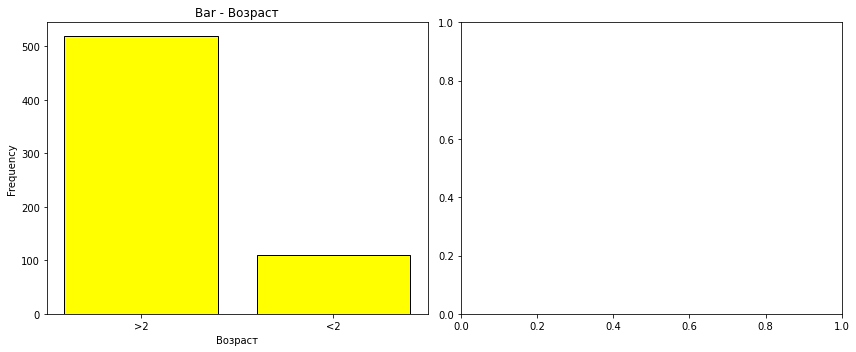

In [29]:
visualize_dataframe_columns(ferma_main_df)

<div class="alert alert-info"> Спасибо за комментарий. Исправлено </div>

Целевой признак Удой содержит 1 выброс, его я удалю. ЭКЕ смещен вправо, это значит, что корм у коров питательный. Показатель сырой протеин смещен влево, что значит более низкое содержание сырого протеина в корме. СПО смещено вправо - сахаро-протеиное содержание повышенное. на ферме преобладает порода вис бик айдиал и холмистый тип пастбища. Порода папы быка разделилась поровну между айдиал и соверин. Жирность смещена вправо и видны много выбросов в левой части. Белок смещен чуть левее, тоже есть выбросы. Молоко чаще вкусное, чем не вкусное. В основном коровы старше 2 лет.

In [30]:
# Избавлюсь от выброса в целевом признаке удой
ferma_main_df=ferma_main_df[ferma_main_df['Удой, кг']!=45616]
ferma_main_df.describe()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),"Жирность,%","Белок,%"
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000
mean,315.474522,6125.968153,14.548726,1923.759554,0.913089,3.604268,3.075670
std,181.475367,475.857053,1.301777,182.832816,0.032221,0.168093,0.002551
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.750000,5749.750000,13.500000,1771.750000,0.890000,3.590000,3.074000
50%,315.500000,6132.500000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.250000,6501.000000,15.600000,2062.250000,0.940000,3.720000,3.077000
max,629.000000,7222.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


In [31]:
# Проверка
ferma_main_df.shape

(628, 12)

In [32]:
# Посмотрим сколько выбросов в признаке Жирность
ferma_main_df[ferma_main_df['Жирность,%']<3.4] ['Жирность,%'].count()

86

<AxesSubplot:xlabel='Удой, кг', ylabel='Жирность,%'>

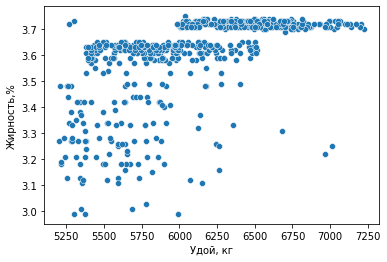

In [33]:
# слишком много выбросов, чтобы их удалять. Посмотрим на диаграмму рассеяния
sns.scatterplot(x='Удой, кг',y='Жирность,%', data=ferma_main_df)

In [34]:
#Можно заметить 2 значения жирности, в которых сконцентрированы практически все значения: 3,6 и 3,7. 
#Все выбросы округлю до нижней границы нормальных значений.
ferma_main_df.loc[ferma_main_df['Жирность,%']<3.4,['Жирность,%']]=3.4

<AxesSubplot:xlabel='Удой, кг', ylabel='Жирность,%'>

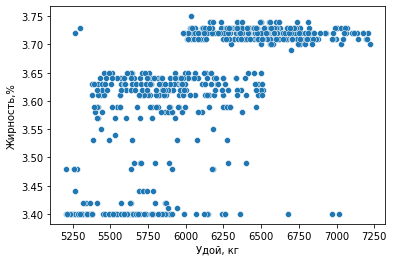

In [35]:
sns.scatterplot(x='Удой, кг',y='Жирность,%', data=ferma_main_df)

In [36]:
# Посмотрим сколько выбросов в признаке Белок
print(ferma_main_df[ferma_main_df['Белок,%']<3.070]['Белок,%'].count())
print(ferma_main_df[ferma_main_df['Белок,%']>=3.082]['Белок,%'].count())

1
4


In [37]:
# Удалим эти выбросы, их немного
ferma_main_df=ferma_main_df[ferma_main_df['Белок,%']>3.070]
ferma_main_df=ferma_main_df[ferma_main_df['Белок,%']<3.082]

In [38]:
#теперь изучим второй датасет
cow_buy_df.describe()

,"Жирность,%","Белок,%"
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


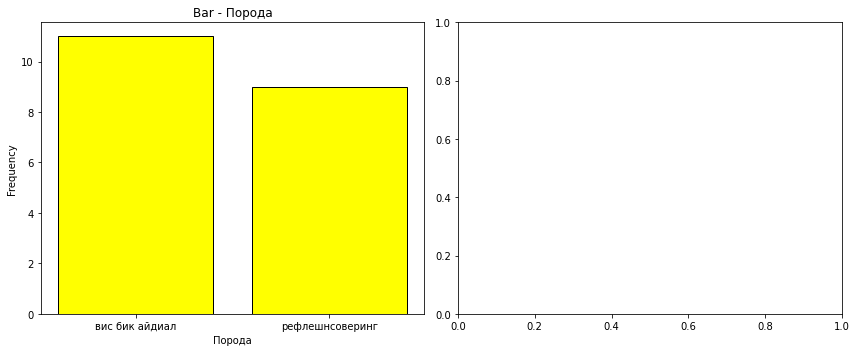

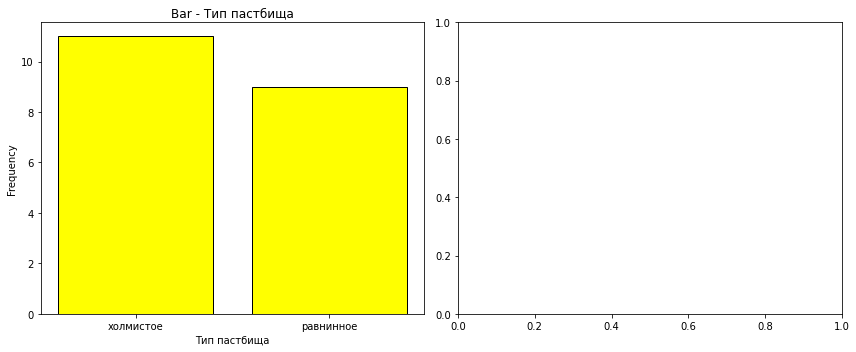

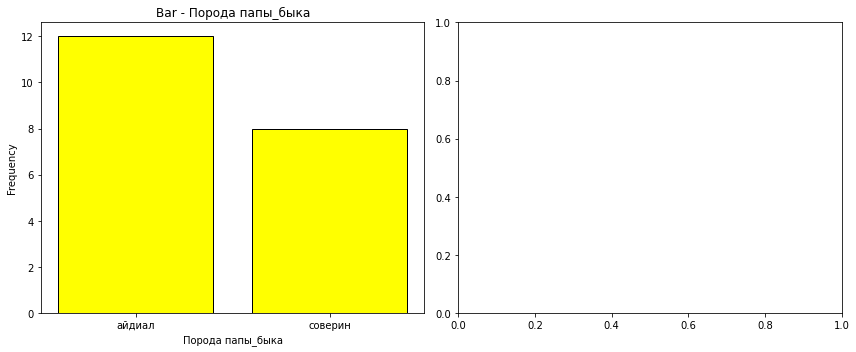

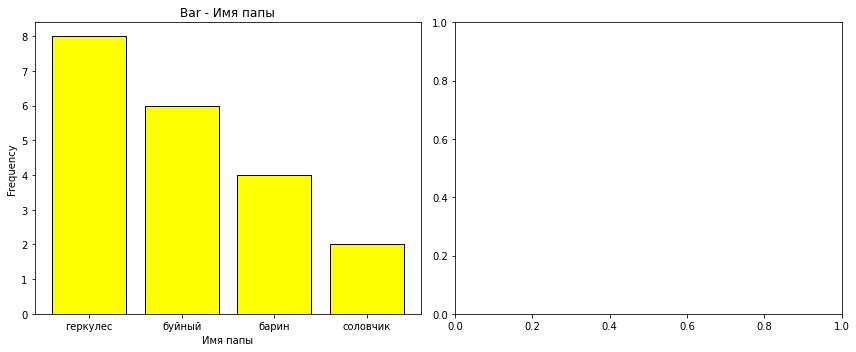

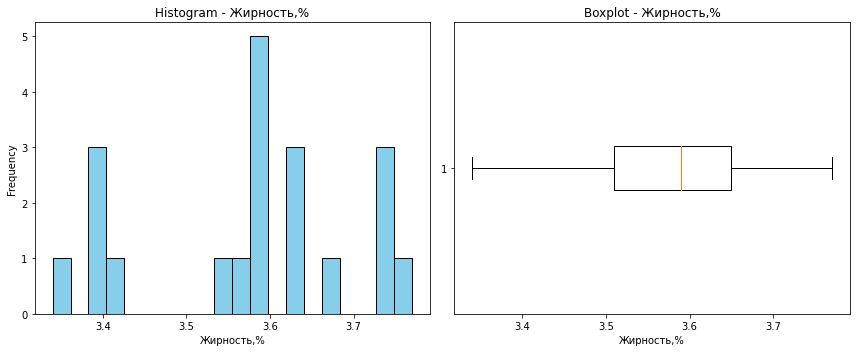

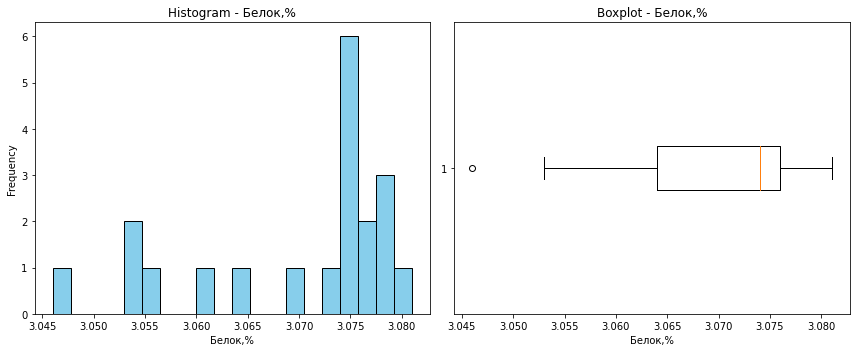

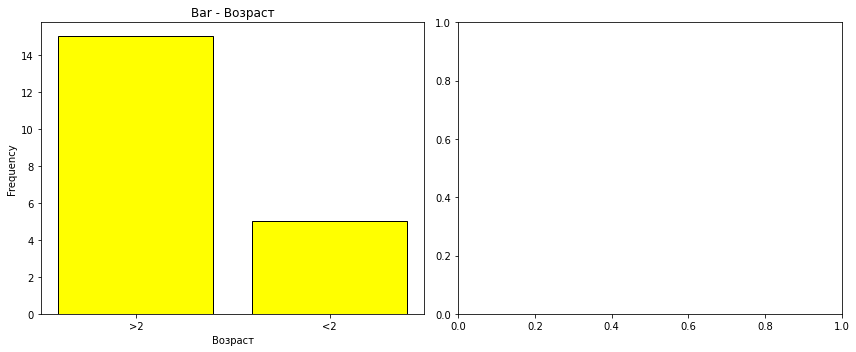

In [39]:
visualize_dataframe_columns(cow_buy_df)

У новых коров признак породы разделился поровну между вис бик айдиал и рефлешнсоверинг.Тип пастбищ тоже разделился поровну между холмистым и равниным. Порода папы быка чаще встречается соверин. у пап буйный и геркулес больше всего детей. Показатель жирности у новых коров более широкий и более дисперсионный, медианная жирность у молока меньше, чем у коров с фермы заказчика. С белком аналогичная ситуация - признак более широкий и дисперсный, медиана лежит левее, чем у коров с фермы заказчика. В основном коробвы старше 2-х лет.
Повышенная дисперсность в признаках, я думаю, связано с тем, что эта выборка очень маленькая по размеру.

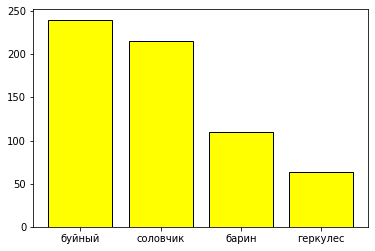

In [40]:
plt.bar(x=ferma_dad_df['Имя папы'].unique(), height=ferma_dad_df['Имя папы'].value_counts(), color='yellow', edgecolor='black')
plt.show()

Быки папы буйный и соловчик - лидеры по кол-ву детей.

## Корреляционный анализ

interval columns not set, guessing: ['id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Жирность,%', 'Белок,%']


<AxesSubplot:>

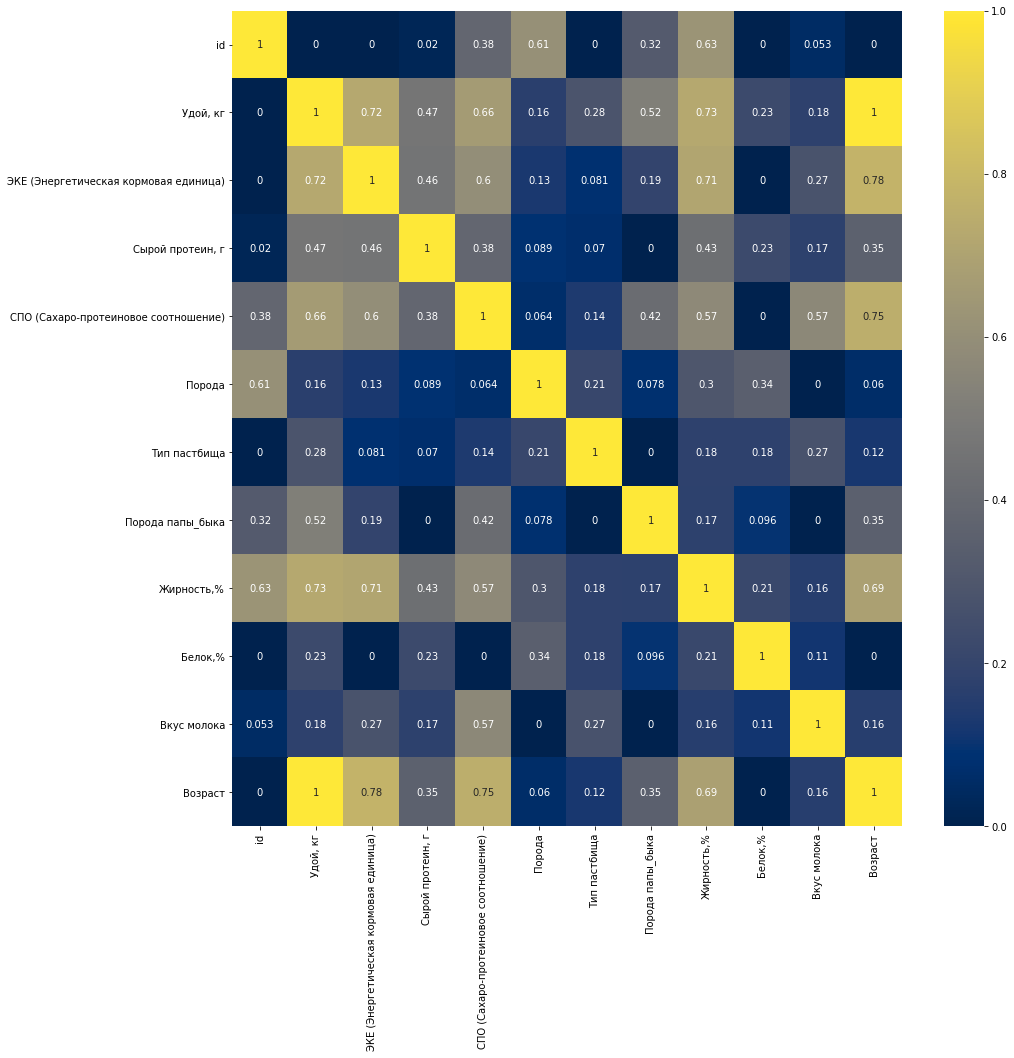

In [41]:
# в нашем датасете и количественные и категориальные переменные, чтобы рассчитать коэффициент корреляции для всех признаков, 
# построю матрицу корреляции фи.
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(ferma_main_df.phik_matrix(), annot=True, cmap='cividis', ax=ax) 



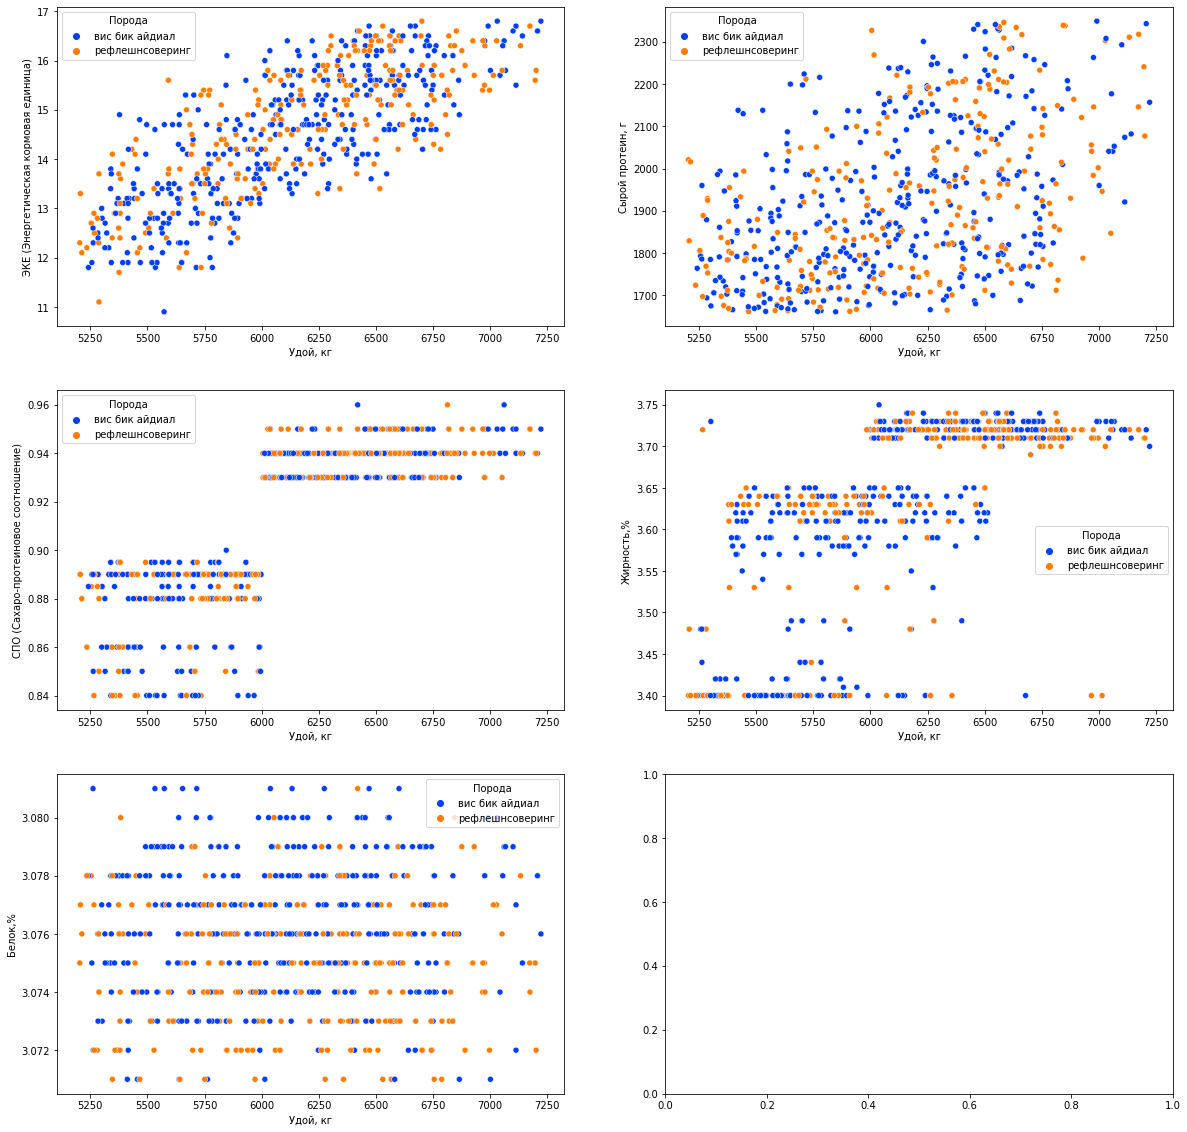

In [42]:
# Построю диаграмму рассеяния для целевого признака Удой с входными признаками
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,20))
sns.scatterplot(x='Удой, кг',y='ЭКЕ (Энергетическая кормовая единица)', data=ferma_main_df, palette='bright',
    hue='Порода',ax=ax[0,0])
sns.scatterplot(x='Удой, кг',y='Сырой протеин, г', data=ferma_main_df, palette='bright',
    hue='Порода', ax=ax[0,1])
sns.scatterplot(x='Удой, кг',y='СПО (Сахаро-протеиновое соотношение)', data=ferma_main_df, palette='bright',
    hue='Порода', ax=ax[1,0])
sns.scatterplot(x='Удой, кг',y='Жирность,%', data=ferma_main_df, palette='bright',
    hue='Порода', ax=ax[1,1])
sns.scatterplot(x='Удой, кг',y='Белок,%', data=ferma_main_df, palette='bright',
    hue='Порода', ax=ax[2,0])
plt.show()

**Вывод:** Согласно шкале Чедока целевой признак Удой имеет сильную линейную связь с признаками ЭКЕ, жирность и возрастом. Наличие лин.зависисмости между ЭКЕ и цел. признаком подтверждается и диаграммой рассеяния - точки значений признака выстроились в одну линию.
Признак СПО имеет нелинейную связь с целевым признаком,его можно разделить на 2 кластера ("<0.92",">0.92"), при СПО <0.92 удой не превышает 6000 кг, как раз нашу целевую границу, заданную в условии, при СПО >0.92 Удой не опускается ниже 6000 кг.
Признак Жирность: видно разделение значений на 2 кластера: при жирности <3.65 - удой не превышает 6500 кг, а при жирности>3.65 удой не опускается ниже 6000 кг, также виднеется большее скопление значений породы рефлешнсоверинг, чем вис бик айдиал при жирности > 3.65.
Белок имеет нелинейную связь с Удоем.
Мультиколлинеарность между признаками не наблюдается, между входными признаками коэффициент корреляции не превышает 0,78 (мультиколлинеарность возникает при значении коэффициента корреляции 0,9-0,95).
Доп. признаки в данные вносить не будем, обучим модель на имеющихся признаках без обработки и посмотрим на качество модели и далее будем улучшать результаты. Вот такой план.

## Обучение модели линейной регрессии

### Модель 1

Для построения простой модели литнейной регрессии необходимы признаки, с которыми у целевого признака есть линейная зависимость.Согласно шкале Чеддока умеренная связь виднеется уже при коэффициенте корреляции от  0.3. Также мне кажется, нужно исключить признаки-характеристики молока, так как они появляются уже после удоя, а значит удой не может зависеть от них. Для построения модели возьму те признаки, коэффициент корреляции которых больше 0.3.

In [43]:
# загрузим датафрейм и удалим необходимые признаки
model_df=ferma_main_df.copy(deep=True)
model_df=model_df.drop(['Жирность,%','Белок,%', 'Вкус молока','Порода','Тип пастбища','id' ], axis=1)

# обозначим категориальные и количественные признаки
num=['ЭКЕ (Энергетическая кормовая единица)','Сырой протеин, г','СПО (Сахаро-протеиновое соотношение)']
cat=['Порода папы_быка','Возраст']

model_df[cat]=model_df[cat].astype('category')

In [44]:
# Разделим выборку на тренировочную и тестовую
X = model_df.drop('Удой, кг', axis=1)
y = model_df['Удой, кг']
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)
# Для проверки выведем размерности
# вывод необходимых размерностей
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(459, 5)
(153, 5)
(459,)
(153,)


In [45]:
model_df.head()

,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода папы_быка,Возраст
0,5863,14.2,1743,0.890,айдиал,>2
1,5529,12.8,2138,0.890,соверин,<2
2,5810,14.0,1854,0.885,соверин,>2
3,5895,12.4,2012,0.885,айдиал,>2
4,5302,12.8,1675,0.885,соверин,<2


In [46]:
# создадим функцию для кодирования категориальных признаков с помощью One-hot-encoding, избегая дамми ловушек, 
# а также масштабирования с помощьбю Standartscaler
# выберем метода кодирования
# сохраним изначальный индекс
def ohe_scaler(X_train, X_test, cat, num):
    initial_index_train = X_train.index
    initial_index_test = X_test.index
    encoder = OneHotEncoder(drop='first', sparse=False)
    X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[cat]), columns=encoder.get_feature_names(cat))
    X_test_encoded = pd.DataFrame(encoder.transform(X_test[cat]), columns=encoder.get_feature_names(cat))

    X_train_encoded.index = initial_index_train[X_train_encoded.index]
    X_test_encoded.index = initial_index_test[X_test_encoded.index]

    X_train = pd.concat([X_train.drop(cat, axis=1), X_train_encoded], axis=1)
    X_test = pd.concat([X_test.drop(cat, axis=1), X_test_encoded], axis=1)
    
    # масштабируем количественные признаки с помощью метода StandartScaler
    # определим метод масштабирования
    scaler = StandardScaler()

    # масштабируем тренировочную выборку
    X_train_scaled =  pd.DataFrame(scaler.fit_transform(X_train[num]), columns=num)

    # масштабируем тестовую выборку
    X_test_scaled = pd.DataFrame(scaler.transform(X_test[num]), columns=num)

    X_train_scaled.index = initial_index_train[X_train_scaled.index]
    X_test_scaled.index = initial_index_test[X_test_scaled.index]

    X_train = pd.concat([X_train.drop(num, axis=1), X_train_scaled], axis=1)
    X_test = pd.concat([X_test.drop(num, axis=1), X_test_scaled], axis=1)
    return X_train,X_test, encoder, scaler



In [47]:
X_train, X_test, encoder, scaler=ohe_scaler(X_train, X_test, cat, num)
display(X_train)
X_test

,Порода папы_быка_соверин,Возраст_>2,ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение)
91,0.0,1.0,1.267821,1.408723,0.522135
527,0.0,1.0,1.040830,1.331898,0.827046
120,1.0,1.0,-2.061383,-1.411831,-0.697509
404,1.0,1.0,0.965166,2.264766,1.131957
430,1.0,1.0,-0.775100,-1.099046,-1.002420
...,...,...,...,...,...
72,0.0,1.0,-0.623772,1.595296,-0.545053
109,0.0,1.0,-0.472445,-0.621637,0.522135
276,1.0,0.0,-0.245454,0.064295,-0.697509
448,0.0,1.0,0.586847,1.710533,0.827046


,Порода папы_быка_соверин,Возраст_>2,ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение)
83,0.0,1.0,0.284192,-0.720411,0.522135
221,0.0,1.0,0.662511,-0.424089,0.827046
56,0.0,1.0,-0.850764,0.656941,-0.545053
617,0.0,1.0,-0.094126,1.095938,0.522135
270,1.0,1.0,-0.245454,1.551397,1.131957
...,...,...,...,...,...
309,0.0,1.0,0.132865,-1.159408,0.522135
69,0.0,0.0,-1.531737,-0.149716,-0.545053
15,0.0,1.0,0.813838,-0.956372,0.522135
585,1.0,1.0,-0.775100,-1.302082,-1.002420


In [48]:
# Обучим модель на тренировочной выборке
# инициализация модели
model_lr_1  = LinearRegression()

# обучение модели на тренировочных данных
model_lr_1=model_lr_1.fit(X_train, y_train)

# вывод рассчитанных коэффициентов
print(model_lr_1.intercept_,model_lr_1.coef_ )

6018.813003999697 [-222.10700856  265.18014811  149.94623727   41.51975085  170.23698726]


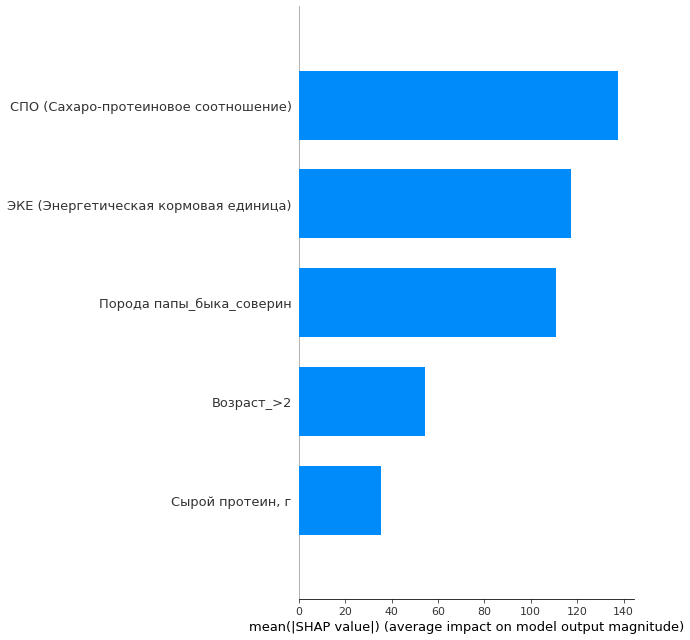

In [49]:
# Использование SHAP

explainer = shap.Explainer(model_lr_1, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_size=(9,9), plot_type='bar')
plt.show()

с помощью библиотеки shap получили визуализацию вклада каждого признака в модель. Диаграмма отсортирована в порядке снижения влияния.

In [50]:
# сделаем первое предсказание
# предсказанные значения для X_test
y_pred = model_lr_1.predict(X_test)

In [51]:
# Оценим качество модели с помощью метрик R2, mse, rmse, mae
def metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)  
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae=mean_absolute_error(y_true, y_pred)
    return r2,mse, rmse, mae
    #print("r2:", r2)
    #print("mse:", mse)
    #print("rmse:", rmse)
    #print("mae:", mae)
r2_1, mse_1, rmse_1, mae_1=metrics(y_test, y_pred)
print("r2:", r2_1)
print("mse:", mse_1)
print("rmse:", rmse_1)
print("mae:", mae_1)

r2: 0.7994385145813583
mse: 42921.00630547916
rmse: 207.17385526527994
mae: 163.88976540802565


Значение коэффициента детерминации около 0,80. Это значит, что в 80% случаев наша модель правильно предсказывает Удой. Не плохой результат, но можно и лучше.

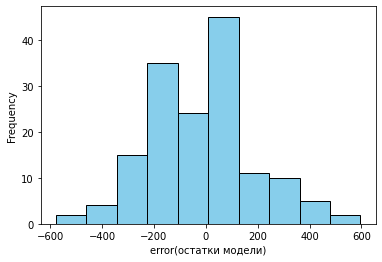

In [52]:
# Проанализирую остатки с помощью графиков
residuals=y_test-y_pred
residuals.plot(kind='hist', color='skyblue', edgecolor='black')
plt.xlabel('error(остатки модели)')
plt.show()

У нас ассиметричное нормальное распределение остатков, смещенное вправо. Это значит, что прогноз, который выдает модель в большинстве случаев заниженный. Значит мы не учли влияние каких-то факторов.

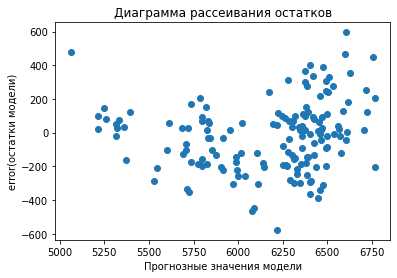

In [53]:
# Проверим постояноство дисперсии
plt.scatter(x=y_pred, y=residuals)
plt.title("Диаграмма рассеивания остатков")
plt.xlabel('Прогнозные значения модели')
plt.ylabel('error(остатки модели)')
plt.show()

Наблюдается чередование низкой и высокой дисперсии остатков. Диаграмма напоминает "рупор". Это плохо, значит наша модель нестабильна(непредсказуема) и ненадежна.

<div class="alert alert-info"> Анализ остатков мы делаем для того, чтобы убедится, что наша модель уловила все закономерности между признаками. Если модель не уловила все взаимосвязи между признаками, то не важно насколько хорошо она предсказывает, возможно она переобучилась. В таком случае модель будет работать не стабильно. Первый график (гистограмма) показывает нам распределение остатков (разница между предсказанным и реальным значением таргета), в идеале мы должны получить симметричное нормальное распределение. Второй график(диаграмма рассеивания остат ков) показывает распределение остатков на прогнозных значениях, в идеале точки должны находится равномерно на всем графике. В нашем же случае, мы видим большее скопление точек при бОльшем прогнозе, значит модель не уловила какие-то закономерности при увеличении удоя. </div>

**Вывод:** я построила первую модель простой линейной регрессии. Дополнительные признаки не были введены в модель, имеющиеся входные признаки были переданы как есть. Из первоначального датасета я убрала те признаки, коэффициент корреляции которых был ниже 0.3, а также признаки-характеристики молока (так как по моему мнению эти характеристик и возникают после удоя, а значит удой не может зависеть от них): порода, тип пастбища, белок, вкус молока, жирность. <br>
В итоге, полученная модель получилась нестабильной в предсказаниях, диаграмма рассеивания остатков напоминает рупор, а гистограмма распределения остатков смещена вправо, значит есть какая-то зависимость возникновения остатков, мы не учли влияние каких-то факторов, прогноз в основном заниженный. Метрика качества R2 показала, что модель предсказывает правильно в 80% случаев, что не плохо, но можно бы и лучше.

### Модель 2

Для построения данной модели необходимо будет исключить нелинейность между входными и целевым признаками.<br>
План такой: 
1) преобразовать признак СПО в категориальный, разделив на 2 кластера - ("<0.92",">=0.92"), при СПО <0.92 удой не превышает 6000 кг, как раз нашу целевую границу, заданную в условии, при СПО >0.92 Удой не опускается ниже 6000 кг.<br>
2) попробуем возвести ЭКЕ и сырой протеин в квадрат<br>
3) а также удалить признаки-характеристики молока
Затем посмотрим, как изменятся матрица корреляции и диаграммы рассеяния.


In [54]:
model_df=ferma_main_df.copy(deep=True)

In [55]:
model_df.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,Порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,>2
1,2,5529,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,<2
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не вкусно,>2
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не вкусно,>2
4,5,5302,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,<2


In [56]:
def new_СПО(value):
    if value<0.92:
        return "<0.92"
    return ">=0.92"

In [57]:
model_df['new_СПО']=model_df['СПО (Сахаро-протеиновое соотношение)'].apply(new_СПО)
model_df['ЭКЕ^2']=model_df['ЭКЕ (Энергетическая кормовая единица)']**2
model_df['Сырой протеин^2']=model_df['Сырой протеин, г']**2


In [58]:
model_df.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,Порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст,new_СПО,ЭКЕ^2,Сырой протеин^2
0,1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,>2,<0.92,201.64,3038049
1,2,5529,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,<2,<0.92,163.84,4571044
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не вкусно,>2,<0.92,196.00,3437316
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не вкусно,>2,<0.92,153.76,4048144
4,5,5302,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,<2,<0.92,163.84,2805625


In [59]:
# Удалим столбцы, которые мы заменили и признаки -характеристики молока
model_df=model_df.drop(['СПО (Сахаро-протеиновое соотношение)','ЭКЕ (Энергетическая кормовая единица)','Сырой протеин, г','Жирность,%','Белок,%', 'Вкус молока','id' ], axis=1)

interval columns not set, guessing: ['Удой, кг', 'ЭКЕ^2', 'Сырой протеин^2']


<AxesSubplot:>

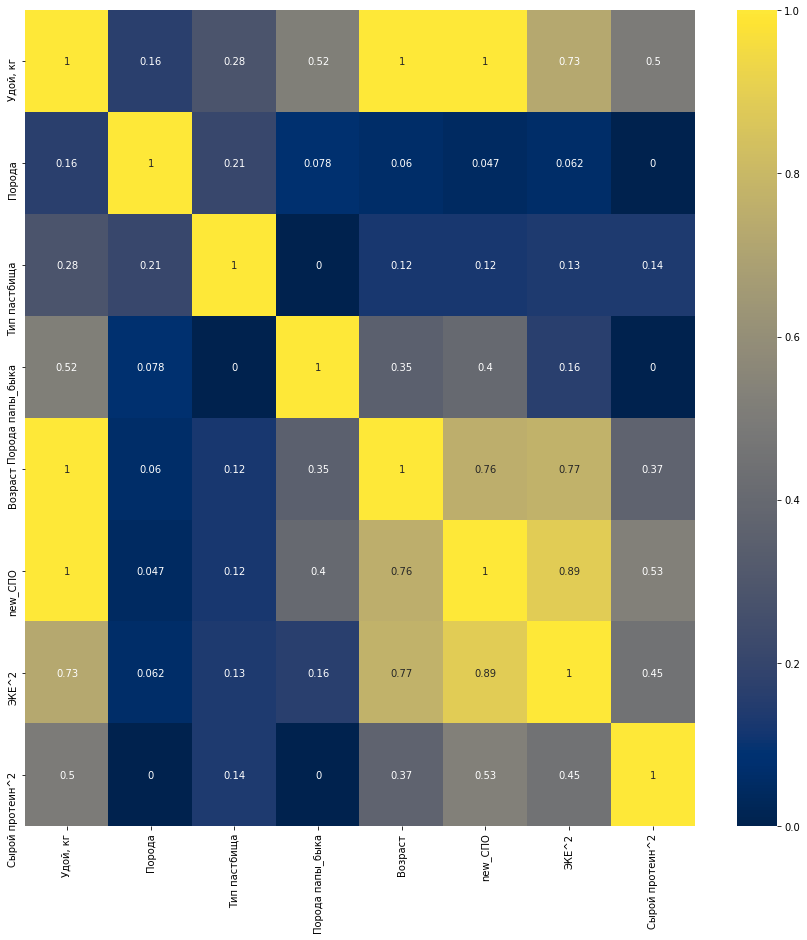

In [60]:
# посмотрим как изменилась матрица корреляции
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(model_df.phik_matrix(), annot=True, cmap='cividis', ax=ax) 

Модификация признаков значительно укрепила линейную связь с целевым признаком. Значит мы на верном пути.

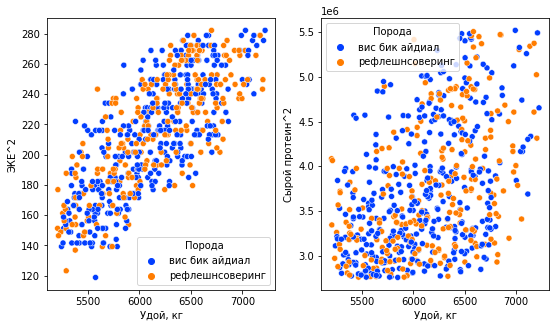

In [61]:
# Посмотрим на диаграммы рассеяния для целевого признака Удой с входными признаками
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,5))
sns.scatterplot(x='Удой, кг',y='ЭКЕ^2', data=model_df, palette='bright',
    hue='Порода',ax=ax[0])
sns.scatterplot(x='Удой, кг',y='Сырой протеин^2', data=model_df, palette='bright',
    hue='Порода', ax=ax[1])
plt.show()

Линейная зависимость немного улучшилась, возведение в квадрат ЭКЕ и Сырой протеин сильно роли не сыграло. разделение СПО на категории значительно укрепила линейную зависимость. Тип пастбища и порода все так же показывают низкие результаты, удалим их. Похоже все таки удой не зависит от местности и породы, а зависит от генов отца, корма и возраста.

In [62]:
model_df=model_df.drop(['Порода','Тип пастбища'], axis=1)

In [63]:
model_df.head(30)

,"Удой, кг",Порода папы_быка,Возраст,new_СПО,ЭКЕ^2,Сырой протеин^2
0,5863,айдиал,>2,<0.92,201.64,3038049
1,5529,соверин,<2,<0.92,163.84,4571044
2,5810,соверин,>2,<0.92,196.00,3437316
3,5895,айдиал,>2,<0.92,153.76,4048144
4,5302,соверин,<2,<0.92,163.84,2805625
5,5254,соверин,<2,<0.92,161.29,3261636
6,5910,соверин,>2,<0.92,174.24,3211264
7,6179,айдиал,>2,>=0.92,216.09,3261636
8,6783,айдиал,>2,>=0.92,201.64,3678724
9,5339,соверин,<2,<0.92,179.56,3207681


In [64]:
# перейду к обучению и прогнозированию
# Разделим выборку на тренировочную и тестовую
X = model_df.drop('Удой, кг', axis=1)
y = model_df['Удой, кг']
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)
# Для проверки выведем размерности
# вывод необходимых размерностей
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(459, 5)
(153, 5)
(459,)
(153,)


In [65]:
# обозначим категориальные и количественные признаки
num=['ЭКЕ^2','Сырой протеин^2']
cat=['Порода папы_быка','Возраст', 'new_СПО']

In [66]:
# закодирую категориальные признаки и масштабирую количественные
X_train, X_test, encoder, scaler=ohe_scaler(X_train, X_test, cat, num)
display(X_train)
X_test

,Порода папы_быка_соверин,Возраст_>2,new_СПО_>=0.92,ЭКЕ^2,Сырой протеин^2
91,0.0,1.0,1.0,1.310465,1.418471
527,0.0,1.0,1.0,1.056725,1.333864
120,1.0,1.0,0.0,-1.935722,-1.330085
404,1.0,1.0,1.0,0.973199,2.398136
430,1.0,1.0,0.0,-0.802455,-1.061540
...,...,...,...,...,...
72,0.0,1.0,0.0,-0.659117,1.626214
109,0.0,1.0,1.0,-0.513671,-0.634218
276,1.0,0.0,0.0,-0.291549,0.016633
448,0.0,1.0,1.0,0.563473,1.756134


,Порода папы_быка_соверин,Возраст_>2,new_СПО_>=0.92,ЭКЕ^2,Сырой протеин^2
83,0.0,1.0,1.0,0.245178,-0.724358
221,0.0,1.0,1.0,0.644364,-0.451232
56,0.0,1.0,0.0,-0.873334,0.613993
617,0.0,1.0,1.0,-0.140834,1.077414
270,1.0,1.0,1.0,-0.291549,1.577044
...,...,...,...,...,...
309,0.0,1.0,1.0,0.089193,-1.114069
69,0.0,0.0,0.0,-1.487527,-0.191101
15,0.0,1.0,1.0,0.807728,-0.936042
585,1.0,1.0,0.0,-0.802455,-1.236889


In [67]:
# Обучим модель на тренировочной выборке
# инициализация модели
model_lr_2  = LinearRegression()

# обучение модели на тренировочных данных
model_lr_2.fit(X_train, y_train)

# вывод рассчитанных коэффициентов
print(model_lr_2.intercept_,model_lr_2.coef_ )

5786.954112613302 [-193.36890382  244.67656342  398.35464067  146.10534942   38.60696324]


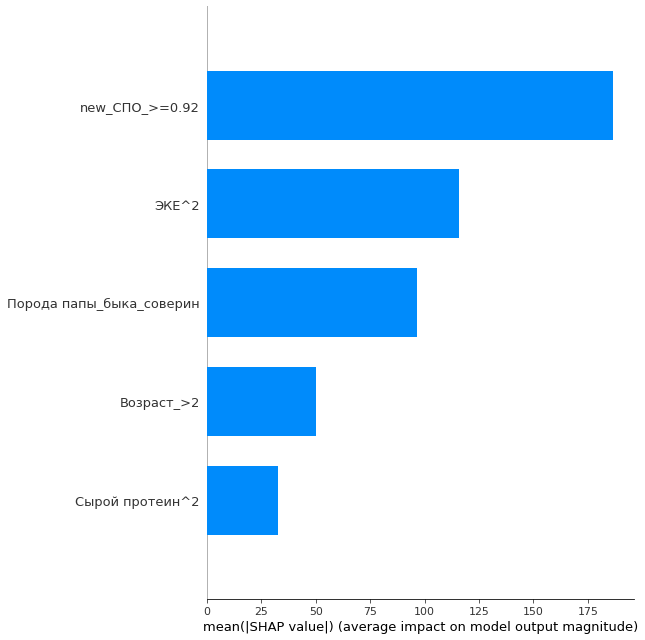

In [68]:
# Использование SHAP

explainer = shap.Explainer(model_lr_2, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_size=(9,9), plot_type='bar')
plt.show()

Больший вклад в результаты модели вносит new_СПО.

In [69]:
# сделаем первое предсказание
# предсказанные значения для X_test
y_pred = model_lr_2.predict(X_test)

In [70]:
# Оценим качество модели с помощью метрик
r2_2, mse_2, rmse_2, mae_2=metrics(y_test, y_pred)
print("r2:", r2_2)
print("mse:", mse_2)
print("rmse:", rmse_2)
print("mae:", mae_2)

r2: 0.8320891514292899
mse: 35933.631899556836
rmse: 189.56168362714243
mae: 145.0848593951115


Значение коэффициента детерминации r2 повысилось, значит наша модель чуть-чуть улучшилась, теперь она правильно предсказывает в 83.2% случаев.

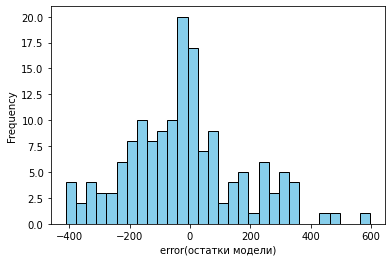

In [71]:
# Проанализирую остатки с помощью графиков
residuals=y_test-y_pred
residuals.plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.xlabel('error(остатки модели)')
plt.show()

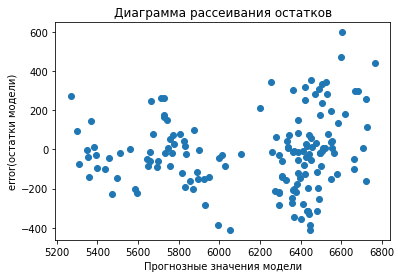

In [72]:
# Проверим постояноство дисперсии
plt.scatter(x=y_pred, y=residuals)
plt.title("Диаграмма рассеивания остатков")
plt.xlabel('Прогнозные значения модели')
plt.ylabel('error(остатки модели)')
plt.show()

Количество остатков сместилось к нулю, это хорошо. Справа видны прерывистое скопление значений около 600. Похоже в модели есть выбросы.

**Вывод:** обучила вторую модель простой линейной регресии. Входные признакы были обработаны: СПО был переделан в категориальный признак, ЭКЕ и сырой протеин возведены в квадрат, признаки-характеристики молока удалены. В итоге линейная зависимость между обработанными и целевым признаком укрепилась. Качество модели немного улучшилось - теперь модель правильно предсказывает в 83,2% случаев. Анализ остатков показал, что модель не очень хорошо работает, остатки выстроились в бимодальное распределение.

### Модель 3

Перейдем к построению третьей модели простой линейной регресси. Добавим признак Имя папы, избавимся от нелинейности и уберем признаки-характеристики молока.

In [73]:
# Объединим таблицы ferma_main_df и ferma_dad_df
model_df=ferma_main_df.copy(deep=True)
model_df=model_df.merge(ferma_dad_df, how='left')
model_df.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,Порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст,Имя папы
0,1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,>2,буйный
1,2,5529,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,<2,соловчик
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не вкусно,>2,барин
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не вкусно,>2,буйный
4,5,5302,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,<2,барин


interval columns not set, guessing: ['id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Жирность,%', 'Белок,%']


<AxesSubplot:>

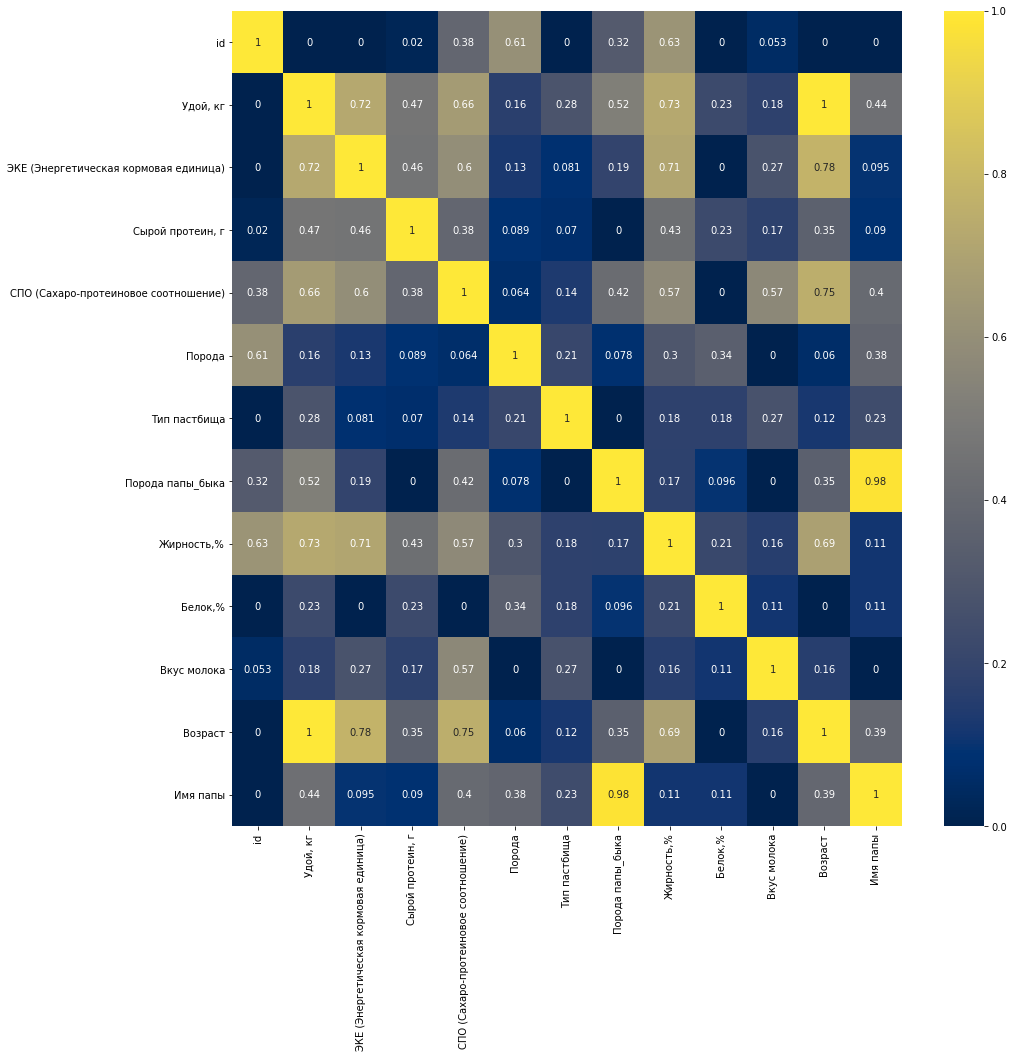

In [74]:
# посмотрим как изменилась матрица корреляции
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(model_df.phik_matrix(), annot=True, cmap='cividis', ax=ax) 

In [75]:
# добавление признака имя папы привело к возникновению мультиколлинеарности, так как порода папы быка очень связан с Имя папы.
# Нужно оставить один из признаков. Удалю признак порода папы быка, а также признаки-характеристики молока и те, у которых коэффициент корреляции меньше 0.3

model_df['new_СПО']=model_df['СПО (Сахаро-протеиновое соотношение)'].apply(new_СПО)
model_df['ЭКЕ^2']=model_df['ЭКЕ (Энергетическая кормовая единица)']**2
model_df['Сырой протеин^2']=model_df['Сырой протеин, г']**2
model_df=model_df.drop(['Порода папы_быка','СПО (Сахаро-протеиновое соотношение)','Сырой протеин, г','ЭКЕ (Энергетическая кормовая единица)','Жирность,%','Белок,%', 'Вкус молока', 'Порода','Тип пастбища', 'id'],axis=1)
model_df.head()

,"Удой, кг",Возраст,Имя папы,new_СПО,ЭКЕ^2,Сырой протеин^2
0,5863,>2,буйный,<0.92,201.64,3038049
1,5529,<2,соловчик,<0.92,163.84,4571044
2,5810,>2,барин,<0.92,196.00,3437316
3,5895,>2,буйный,<0.92,153.76,4048144
4,5302,<2,барин,<0.92,163.84,2805625


interval columns not set, guessing: ['Удой, кг', 'ЭКЕ^2', 'Сырой протеин^2']


<AxesSubplot:>

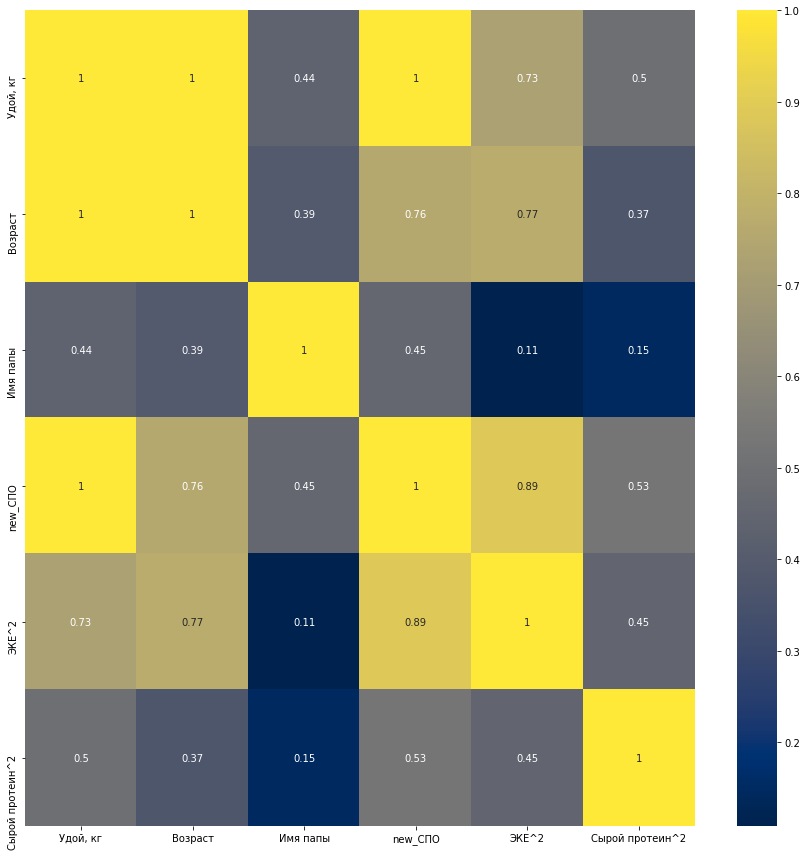

In [76]:
# посмотрим как изменилась матрица корреляции
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(model_df.phik_matrix(), annot=True, cmap='cividis', ax=ax) 

Модификация признаков значительно укрепила линейную связь с целевым признаком. Значит мы на верном пути.

In [77]:
# перейду к обучению и прогнозированию
# Разделим выборку на тренировочную и тестовую
X = model_df.drop('Удой, кг', axis=1)
y = model_df['Удой, кг']
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)
# Для проверки выведем размерности
# вывод необходимых размерностей
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(459, 5)
(153, 5)
(459,)
(153,)


In [78]:
X_train

,Возраст,Имя папы,new_СПО,ЭКЕ^2,Сырой протеин^2
88,>2,буйный,>=0.92,262.44,4743684
512,>2,буйный,>=0.92,252.81,4682896
117,>2,барин,<0.92,139.24,2768896
393,>2,барин,>=0.92,249.64,5447556
417,>2,барин,<0.92,182.25,2961841
...,...,...,...,...,...
71,>2,барин,<0.92,187.69,4892944
106,>2,буйный,>=0.92,193.21,3268864
270,<2,барин,<0.92,201.64,3736489
435,>2,буйный,>=0.92,234.09,4986289


In [79]:
# обозначим категориальные и количественные признаки
num=['ЭКЕ^2','Сырой протеин^2']
cat=['Имя папы','Возраст', 'new_СПО']

In [80]:
# закодирую категориальные признаки и масштабирую количественные
X_train, X_test, encoder, scaler=ohe_scaler(X_train, X_test, cat, num)
display(X_train)
X_test

,Имя папы_буйный,Имя папы_геркулес,Имя папы_соловчик,Возраст_>2,new_СПО_>=0.92,ЭКЕ^2,Сырой протеин^2
88,1.0,0.0,0.0,1.0,1.0,1.310465,1.418471
512,1.0,0.0,0.0,1.0,1.0,1.056725,1.333864
117,0.0,0.0,0.0,1.0,0.0,-1.935722,-1.330085
393,0.0,0.0,0.0,1.0,1.0,0.973199,2.398136
417,0.0,0.0,0.0,1.0,0.0,-0.802455,-1.061540
...,...,...,...,...,...,...,...
71,0.0,0.0,0.0,1.0,0.0,-0.659117,1.626214
106,1.0,0.0,0.0,1.0,1.0,-0.513671,-0.634218
270,0.0,0.0,0.0,0.0,0.0,-0.291549,0.016633
435,1.0,0.0,0.0,1.0,1.0,0.563473,1.756134


,Имя папы_буйный,Имя папы_геркулес,Имя папы_соловчик,Возраст_>2,new_СПО_>=0.92,ЭКЕ^2,Сырой протеин^2
81,0.0,0.0,0.0,1.0,1.0,0.245178,-0.724358
218,1.0,0.0,0.0,1.0,1.0,0.644364,-0.451232
55,0.0,0.0,0.0,1.0,0.0,-0.873334,0.613993
600,0.0,1.0,0.0,1.0,1.0,-0.140834,1.077414
264,0.0,0.0,0.0,1.0,1.0,-0.291549,1.577044
...,...,...,...,...,...,...,...
302,1.0,0.0,0.0,1.0,1.0,0.089193,-1.114069
68,0.0,0.0,1.0,0.0,0.0,-1.487527,-0.191101
15,1.0,0.0,0.0,1.0,1.0,0.807728,-0.936042
568,0.0,0.0,0.0,1.0,0.0,-0.802455,-1.236889


In [81]:
# Обучим модель на тренировочной выборке
# инициализация модели
model_lr_3  = LinearRegression()

# обучение модели на тренировочных данных
model_lr_3.fit(X_train, y_train)

# вывод рассчитанных коэффициентов
print(model_lr_3.intercept_,model_lr_3.coef_ )

5605.501337672436 [238.28515934 233.57530099  12.0902401  226.74432114 381.73051776
 153.25614189  39.50560504]


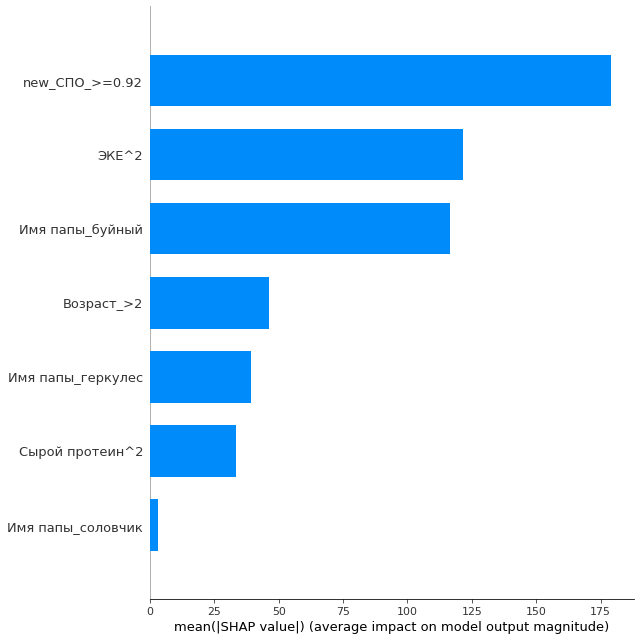

In [82]:
# Использование SHAP

explainer = shap.Explainer(model_lr_3, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_size=(9,9), plot_type='bar')
plt.show()

Больший вклад все так же вносит признак new_СПО

In [83]:
# сделаем первое предсказание
# предсказанные значения для X_test
y_pred = model_lr_3.predict(X_test)

In [84]:
# Оценим качество модели с помощью метрики R2
r2_3 = r2_score(y_test, y_pred)  
print(r2_3)

0.8420702980396881


Значение коэффициенета детерминации r_2 повысилось. Эта лучшая из 3-х моделей. Посмотрим на остатки.

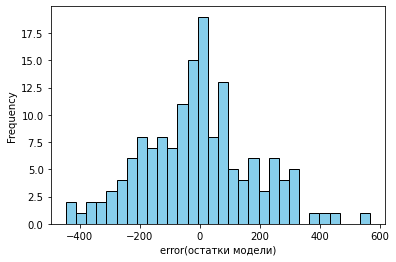

In [85]:
# Проанализирую остатки с помощью графиков
residuals=y_test-y_pred
residuals.plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.xlabel('error(остатки модели)')
plt.show()

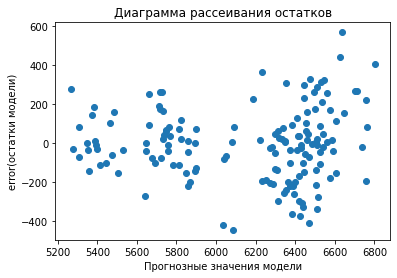

In [86]:
# Проверим постояноство дисперсии
plt.scatter(x=y_pred, y=residuals)
plt.title("Диаграмма рассеивания остатков")
plt.xlabel('Прогнозные значения модели')
plt.ylabel('error(остатки модели)')
plt.show()

Количество остатков около нуля, это хорошо. Справа видны прерывистое скопление значений около 600. Похоже в модели есть выбросы.

In [87]:
# Оценим качество модели с помощью метрик
r2_3, mse_3, rmse_3, mae_3=metrics(y_test, y_pred)
print('Метрики качества модели №1:')
print("r2:", r2_1)
print("mse:", mse_1)
print("rmse:", rmse_1)
print("mae:", mae_1)
print()
print('Метрики качества модели №2:')
print("r2:", r2_2)
print("mse:", mse_2)
print("rmse:", rmse_2)
print("mae:", mae_2)
print()
print('Метрики качества модели №3:')
print("r2:", r2_3)
print("mse:", mse_3)
print("rmse:", rmse_3)
print("mae:", mae_3)

Метрики качества модели №1:
r2: 0.7994385145813583
mse: 42921.00630547916
rmse: 207.17385526527994
mae: 163.88976540802565

Метрики качества модели №2:
r2: 0.8320891514292899
mse: 35933.631899556836
rmse: 189.56168362714243
mae: 145.0848593951115

Метрики качества модели №3:
r2: 0.8420702980396881
mse: 33797.62430215301
rmse: 183.841301948591
mae: 141.39271723625518


In [88]:
# Рассчитаем доверительный интервал прогнозных значений лучшей модели
#Найдем среднее
mean = np.mean(y_pred)
# Найдем стандартное отклонение
std_dev = np.std(y_pred, ddof=1)
# confidence level возьмем 95%
confidence_level = 0.95
margin_of_error = stats.norm.ppf((1 + confidence_level) / 2) * (std_dev / np.sqrt(len(y_pred)))
lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

print(f"Среднее: {mean:.2f}")
print(f"Доверительный интервал: ({lower_bound:.2f}, {upper_bound:.2f})")

Среднее: 6151.28
Доверительный интервал: (6084.90, 6217.67)


**Вывод:** Очевидно, что по всем метрикам качества побеждает третья модель. Значит ее и выберем для прогнозирования. Доверительный интервал лучшей модели показывает, что с 95% уверенностью удой коров в диапазоне (6084.90, 6217.67).

### Прогнозирование удоя на датасете cow_buy

In [89]:
# подготовим датасет cow_buy_df для прогнозирования.
# Добавим недостающие входные признаки: СПО, сырой протеин и ЭКЕ, взяв средние значения из ferma_main_df и прибавив 5%
cow_buy_df['СПО (Сахаро-протеиновое соотношение)']=round(ferma_main_df['СПО (Сахаро-протеиновое соотношение)'].mean()*1.05,3)
cow_buy_df['Сырой протеин, г']=(ferma_main_df['Сырой протеин, г'].mean()*1.05).astype('int')
cow_buy_df['ЭКЕ (Энергетическая кормовая единица)']=round(ferma_main_df['ЭКЕ (Энергетическая кормовая единица)'].mean()*1.05,1)
model_df=cow_buy_df.copy(deep=True)
model_df['Сырой протеин^2']=(cow_buy_df['Сырой протеин, г']**2).astype(int)
model_df['ЭКЕ^2']=round(cow_buy_df['ЭКЕ (Энергетическая кормовая единица)']**2,2)
model_df['new_СПО']=model_df['СПО (Сахаро-протеиновое соотношение)'].apply(new_СПО)
model_df.head()

,Порода,Тип пастбища,Порода папы_быка,Имя папы,"Жирность,%","Белок,%",Возраст,СПО (Сахаро-протеиновое соотношение),"Сырой протеин, г",ЭКЕ (Энергетическая кормовая единица),Сырой протеин^2,ЭКЕ^2,new_СПО
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,>2,0.959,2020,15.3,4080400,234.09,>=0.92
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,<2,0.959,2020,15.3,4080400,234.09,>=0.92
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,>2,0.959,2020,15.3,4080400,234.09,>=0.92
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,>2,0.959,2020,15.3,4080400,234.09,>=0.92
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,>2,0.959,2020,15.3,4080400,234.09,>=0.92


In [90]:
model_df=model_df.drop(['Порода папы_быка','СПО (Сахаро-протеиновое соотношение)', 'Жирность,%','Белок,%', 'Порода','Тип пастбища','Сырой протеин, г','ЭКЕ (Энергетическая кормовая единица)'],axis=1)
model_df.head()

,Имя папы,Возраст,Сырой протеин^2,ЭКЕ^2,new_СПО
0,геркулес,>2,4080400,234.09,>=0.92
1,буйный,<2,4080400,234.09,>=0.92
2,барин,>2,4080400,234.09,>=0.92
3,буйный,>2,4080400,234.09,>=0.92
4,буйный,>2,4080400,234.09,>=0.92


In [91]:
# обозначим категориальные и количественные признаки
num=['ЭКЕ^2','Сырой протеин^2']
cat=['Имя папы','Возраст', 'new_СПО']

In [92]:
initial_index_test = model_df.index
# закодирую категориальные признаки с помощью One-hot-encoding
X_test_encoded = pd.DataFrame(encoder.transform(model_df[cat]), columns=encoder.get_feature_names(cat))
X_test_encoded.index = initial_index_test[X_test_encoded.index]
X_test = pd.concat([model_df.drop(cat, axis=1), X_test_encoded], axis=1)

# масштабируем тестовую выборку
X_test_scaled = pd.DataFrame(scaler.transform(X_test[num]), columns=num)
X_test_scaled.index = initial_index_test[X_test_scaled.index]
X_test = pd.concat([X_test.drop(num, axis=1), X_test_scaled], axis=1)


In [93]:
X_test

,Имя папы_буйный,Имя папы_геркулес,Имя папы_соловчик,Возраст_>2,new_СПО_>=0.92,ЭКЕ^2,Сырой протеин^2
0,0.0,1.0,0.0,1.0,1.0,0.563473,0.495296
1,1.0,0.0,0.0,0.0,1.0,0.563473,0.495296
2,0.0,0.0,0.0,1.0,1.0,0.563473,0.495296
3,1.0,0.0,0.0,1.0,1.0,0.563473,0.495296
4,1.0,0.0,0.0,1.0,1.0,0.563473,0.495296
5,0.0,1.0,0.0,0.0,1.0,0.563473,0.495296
6,0.0,1.0,0.0,1.0,1.0,0.563473,0.495296
7,1.0,0.0,0.0,1.0,1.0,0.563473,0.495296
8,0.0,0.0,0.0,1.0,1.0,0.563473,0.495296
9,1.0,0.0,0.0,0.0,1.0,0.563473,0.495296


In [94]:
# сделаем предсказание
y_pred_volume = model_lr_3.predict(X_test)

In [95]:
y_pred_volume

array([6553.47419332, 6331.43973053, 6319.89889233, 6558.18405167,
       6558.18405167, 6326.72987218, 6553.47419332, 6558.18405167,
       6319.89889233, 6331.43973053, 6331.98913243, 6553.47419332,
       6553.47419332, 6093.15457119, 6319.89889233, 6558.18405167,
       6331.98913243, 6326.72987218, 6558.18405167, 6558.18405167])

**Вывод:** Мне кажется, очень плохо, что у нас нет точных данных о корме новых коров. Думаю их можно было бы рассчитать зная вес коровы, возможно еще какие-то признаки. Потому что как мы видели из матрицы корреляций, удой имеет сильную линейную связь с признаками характеристика корма. Поэтому для более точного предсказания, нам нужны точные признаки-характеристики корма, а не среднее значение.<br>
Модель спрогнозировала, что удой у всех коров будет больше 6000 л.

## Обучение модели логистической регрессии

В этой главе нам предстоит предсказать вкус молока с помощью логистической регрессии. Я думаю, что вкус молока зависит от признаков-характеристик корма и молока(так как вкус появляется уже после получения молока), возьму эти признаки для обучения модели

In [96]:
# загрузим датасет
model_df=ferma_main_df.copy(deep=True)

In [97]:
# Обработаем признаки СПО , ЭКЕ и сырой протеин
model_df['new_СПО']=model_df['СПО (Сахаро-протеиновое соотношение)'].apply(new_СПО)
model_df['ЭКЕ^2']=model_df['ЭКЕ (Энергетическая кормовая единица)']**2
model_df['Сырой протеин^2']=model_df['Сырой протеин, г']**2

In [98]:
model_df.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,Порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст,new_СПО,ЭКЕ^2,Сырой протеин^2
0,1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,>2,<0.92,201.64,3038049
1,2,5529,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,<2,<0.92,163.84,4571044
2,3,5810,14.0,1854,0.885,рефлешнсоверинг,холмистое,соверин,3.59,3.074,не вкусно,>2,<0.92,196.00,3437316
3,4,5895,12.4,2012,0.885,рефлешнсоверинг,холмистое,айдиал,3.40,3.075,не вкусно,>2,<0.92,153.76,4048144
4,5,5302,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,<2,<0.92,163.84,2805625


interval columns not set, guessing: ['id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Жирность,%', 'Белок,%', 'ЭКЕ^2', 'Сырой протеин^2']


<AxesSubplot:>

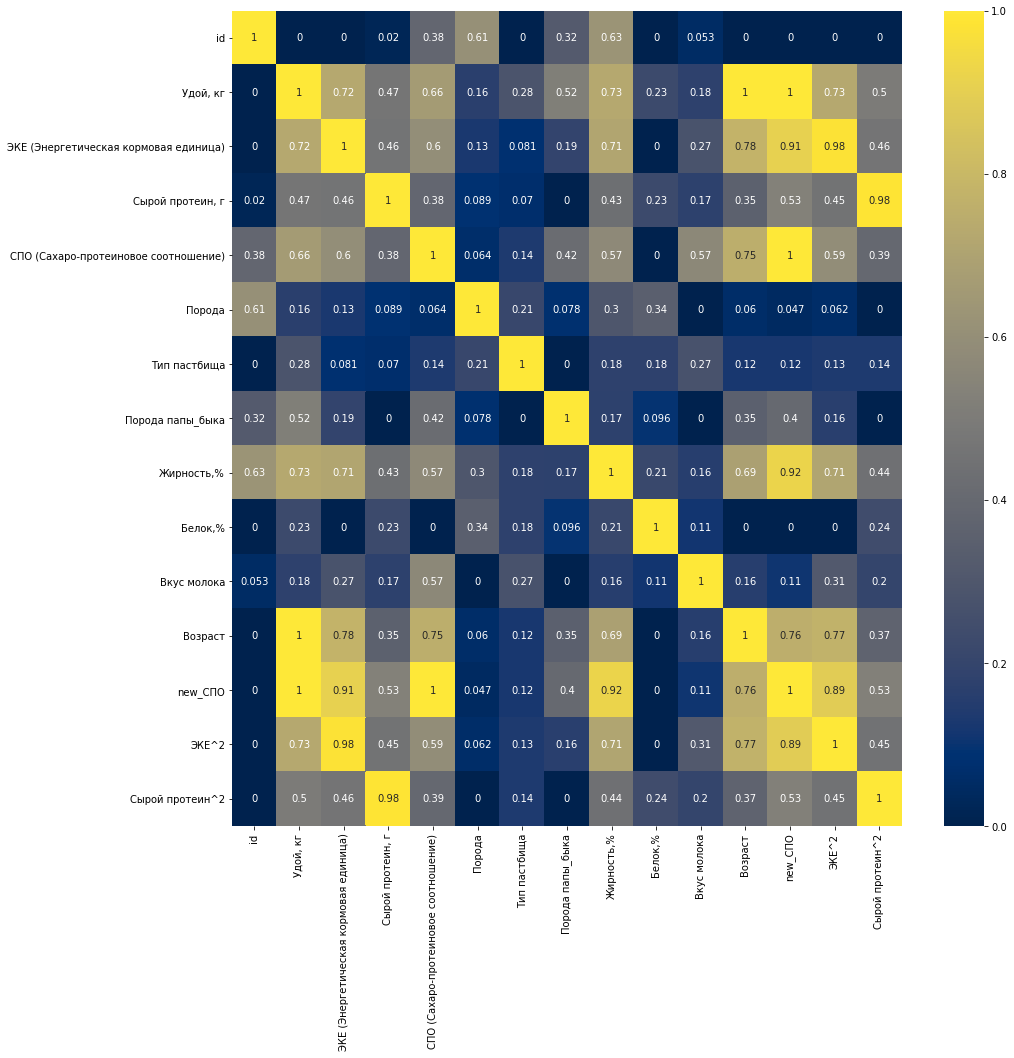

In [99]:
# изучим еще раз матрицу корреляции
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(model_df.phik_matrix(), annot=True, cmap='cividis', ax=ax) 

In [100]:
# Добавленные модифицированные признаки ЭКЕ и сырой протеин повысили коэффициент корреляции с цел. признаком, а признак СПО наоборот ухудшил. Удалим его и оставим изначальный вариант.
# Удалим признаки с нулевой корреляцией, а также удой, ЭКЕ и сырой протеин
model_df=model_df.drop(['id','Удой, кг','Порода','Порода папы_быка','ЭКЕ (Энергетическая кормовая единица)','Сырой протеин, г','new_СПО'],axis=1)
model_df.head()

,СПО (Сахаро-протеиновое соотношение),Тип пастбища,"Жирность,%","Белок,%",Вкус молока,Возраст,ЭКЕ^2,Сырой протеин^2
0,0.890,равнинное,3.58,3.076,вкусно,>2,201.64,3038049
1,0.890,равнинное,3.54,3.079,вкусно,<2,163.84,4571044
2,0.885,холмистое,3.59,3.074,не вкусно,>2,196.00,3437316
3,0.885,холмистое,3.40,3.075,не вкусно,>2,153.76,4048144
4,0.885,равнинное,3.73,3.073,вкусно,<2,163.84,2805625


In [101]:
# Пометим значения вкуса молока: 0-не вкусное, 1-вкусное
model_df['Вкус молока']=model_df['Вкус молока'].replace({'не вкусно':0,'вкусно':1})

In [102]:
# перейду к обучению и прогнозированию
# Разделим выборку на тренировочную и тестовую
X = model_df.drop('Вкус молока', axis=1)
y = model_df['Вкус молока']
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE,stratify=y)
# Для проверки выведем размерности
# вывод необходимых размерностей
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(459, 7)
(153, 7)
(459,)
(153,)


In [103]:
X_train.head()

,СПО (Сахаро-протеиновое соотношение),Тип пастбища,"Жирность,%","Белок,%",Возраст,ЭКЕ^2,Сырой протеин^2
435,0.94,холмистое,3.71,3.080,>2,246.49,3455881
397,0.89,холмистое,3.48,3.077,<2,176.89,3345241
526,0.88,равнинное,3.63,3.072,>2,234.09,3168400
390,0.88,равнинное,3.59,3.073,<2,163.84,3125824
487,0.94,равнинное,3.62,3.073,>2,182.25,3392964


In [104]:
# обозначим категориальные и количественные признаки
num=['СПО (Сахаро-протеиновое соотношение)','Жирность,%','Белок,%','ЭКЕ^2','Сырой протеин^2']
cat=['Тип пастбища','Возраст']

In [105]:
# закодирую категориальные признаки и масштабирую количественные
X_train, X_test, encoder, scaler=ohe_scaler(X_train, X_test, cat, num)
display(X_train)
X_test

,Тип пастбища_холмистое,Возраст_>2,СПО (Сахаро-протеиновое соотношение),"Жирность,%","Белок,%",ЭКЕ^2,Сырой протеин^2
435,1.0,1.0,0.853018,0.719857,1.847277,0.900857,-0.365042
397,1.0,0.0,-0.724481,-1.304525,0.542815,-0.984077,-0.520710
526,0.0,1.0,-1.039981,0.015724,-1.631288,0.565035,-0.769521
390,0.0,0.0,-1.039981,-0.336342,-1.196467,-1.337502,-0.829424
487,0.0,1.0,0.853018,-0.072292,-1.196467,-0.838915,-0.453564
...,...,...,...,...,...,...,...
191,0.0,1.0,-0.724481,-0.072292,-0.326826,-1.127072,1.197953
444,1.0,1.0,0.853018,0.719857,-0.761646,1.420838,-0.385944
163,0.0,0.0,-1.039981,-0.336342,0.542815,-1.809547,-0.658646
110,0.0,1.0,0.537518,0.807873,-0.761646,1.420838,1.870132


,Тип пастбища_холмистое,Возраст_>2,СПО (Сахаро-протеиновое соотношение),"Жирность,%","Белок,%",ЭКЕ^2,Сырой протеин^2
218,0.0,1.0,0.853018,0.807873,-1.196467,1.598498,-1.223174
220,1.0,0.0,-1.670981,-1.832624,-0.326826,-1.543057,-0.992070
320,0.0,1.0,0.853018,0.807873,-1.196467,1.598498,-0.809502
596,0.0,1.0,1.168518,0.807873,0.977636,1.509397,0.106195
247,0.0,1.0,1.168518,0.807873,-1.196467,0.816089,0.316420
...,...,...,...,...,...,...,...
155,0.0,0.0,-1.670981,-0.336342,-1.196467,-1.055845,1.203968
188,0.0,1.0,0.853018,0.719857,-0.761646,0.816089,1.788208
574,1.0,1.0,0.853018,0.895890,0.542815,-0.001799,0.150115
159,0.0,1.0,0.537518,-0.336342,-0.326826,-0.158877,-1.322244


In [106]:
# обучю модель логистической регрессии
clf = LogisticRegression(random_state = 42)
clf.fit(X_train,y_train )

LogisticRegression(random_state=42)

In [107]:
# получим прогнозные метки классов
y_pred = clf.predict(X_test)

In [108]:
len(y_pred)

153

In [109]:
pd.DataFrame(zip(y_test, y_pred), columns = ['test','pred']).head() 

,test,pred
0,1,1
1,0,0
2,1,1
3,1,1
4,0,1


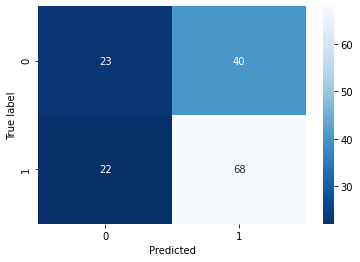

In [110]:
 # создадим матрицу ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

In [111]:
# напишем функцию для расчета метрик классификац. модели
def class_metrics(y_test, y_pred):
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print('recall: ',round(recall ,3))
    print('precision: ',round(precision,3))
    print('accuracy: ',round(accuracy,3))

In [112]:
class_metrics(y_test, y_pred)

recall:  0.756
precision:  0.63
accuracy:  0.595


Качество модели низкое. Метрика accuracy показывает, что наша модель достаточно часто ошибается, около 40% предсказанных значений не верные. recall достаточно высокий, а вот precision достаточно н изкий, это означает, что Фермеру важно, чтобы молоко было вкусное, поэтому нам нужно свести ошибку False Positiv к нулю.. Это означает, что наша модель чаще делает ошибку первого рода (False Positiv). Как раз эту ошибку нам нужно свести к нулу(то есть повысить precision), так как фермеру важно, чтобы молоко точно было вкусное, он платит за качество, а не за количество. Сейчас наша модель делает ошибку False Positiv в 40 случаев из 153.

In [113]:
# Выведем значения(реальные и предсказанные) и вероятности 1 класса для каждого значения в убывающем  порядке.
y_proba_1_class = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba_1_class, y_pred),
columns = ['y_valid', 'y_proba_1_class', 'y_pred']).sort_values(by='y_proba_1_class',ascending=False) 
data

,y_valid,y_proba_1_class,y_pred
77,1,0.887301,1
32,1,0.865600,1
27,1,0.850611,1
7,1,0.837236,1
31,1,0.837233,1
...,...,...,...
129,0,0.269980,0
41,0,0.269857,0
131,1,0.252017,0
141,0,0.248198,0


Вероятность, с которой модель предсказывает 1 класс не превышает 89%. Нам нужно найти такой порог вероятности, при котором ошибки первого рода будут нулевыми.

In [114]:
# Создадим таблицу с градацией порогов и посчитаем ошибки первого рода для них.
thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 12,endpoint=False)]

values = []
columns = []
for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'] = data['y_proba_1_class'].apply(lambda x: 1 if x>= i else 0)
    data['FP'] = data.apply(lambda x : 1 if (x.y_valid==0 and x.y_pred_==1) else 0, axis=1)
    values.append(data['FP'].sum())
costs = pd.DataFrame(zip(columns, values),columns = ['Порог', 'Кол-во FP']) 
costs

,Порог,Кол-во FP
0,y_pred_0.1,63
1,y_pred_0.18,62
2,y_pred_0.25,61
3,y_pred_0.32,54
4,y_pred_0.4,50
5,y_pred_0.48,42
6,y_pred_0.55,35
7,y_pred_0.62,27
8,y_pred_0.7,13
9,y_pred_0.77,2


При пороге 0.85 количество FP ошибок равно нулю, посмотрим на матрицу ошибок.

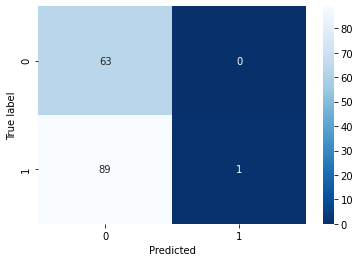

In [115]:
# Посмотрим на обновленную матрицу ошибок. При 0.85 вылетает одна ошибка FP, возьмем 0.87
data['y_pred_']=data['y_proba_1_class'].apply(lambda x: 1 if x> 0.87 else 0)
cm = confusion_matrix(y_test, data['y_pred_'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

In [116]:
class_metrics(y_test, data['y_pred_'])

recall:  0.011
precision:  1.0
accuracy:  0.418


Precision 100%, это то, чего мы и добивались. Остальные метрики ухудшились, но для нас это не приоритет.

### Предсказание на выборке cow_buy_df

In [117]:
# подготовим данные
model_df=cow_buy_df.copy(deep=True)
model_df['ЭКЕ^2']=round(model_df['ЭКЕ (Энергетическая кормовая единица)']**2,2)
model_df['Сырой протеин^2']=(model_df['Сырой протеин, г']**2).astype('int')

In [118]:
cow_buy_df

,Порода,Тип пастбища,Порода папы_быка,Имя папы,"Жирность,%","Белок,%",Возраст,СПО (Сахаро-протеиновое соотношение),"Сырой протеин, г",ЭКЕ (Энергетическая кормовая единица)
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,>2,0.959,2020,15.3
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,<2,0.959,2020,15.3
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,>2,0.959,2020,15.3
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,>2,0.959,2020,15.3
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,>2,0.959,2020,15.3
5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,<2,0.959,2020,15.3
6,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,>2,0.959,2020,15.3
7,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,>2,0.959,2020,15.3
8,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,>2,0.959,2020,15.3
9,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,<2,0.959,2020,15.3


In [119]:
model_df

,Порода,Тип пастбища,Порода папы_быка,Имя папы,"Жирность,%","Белок,%",Возраст,СПО (Сахаро-протеиновое соотношение),"Сырой протеин, г",ЭКЕ (Энергетическая кормовая единица),ЭКЕ^2,Сырой протеин^2
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,>2,0.959,2020,15.3,234.09,4080400
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,<2,0.959,2020,15.3,234.09,4080400
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,>2,0.959,2020,15.3,234.09,4080400
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,>2,0.959,2020,15.3,234.09,4080400
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,>2,0.959,2020,15.3,234.09,4080400
5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,<2,0.959,2020,15.3,234.09,4080400
6,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,>2,0.959,2020,15.3,234.09,4080400
7,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,>2,0.959,2020,15.3,234.09,4080400
8,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,>2,0.959,2020,15.3,234.09,4080400
9,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,<2,0.959,2020,15.3,234.09,4080400


In [120]:
model_df=model_df.drop(['Порода','Порода папы_быка','Имя папы','ЭКЕ (Энергетическая кормовая единица)','Сырой протеин, г'],axis=1)
model_df

,Тип пастбища,"Жирность,%","Белок,%",Возраст,СПО (Сахаро-протеиновое соотношение),ЭКЕ^2,Сырой протеин^2
0,холмистое,3.58,3.076,>2,0.959,234.09,4080400
1,равнинное,3.54,3.081,<2,0.959,234.09,4080400
2,равнинное,3.59,3.074,>2,0.959,234.09,4080400
3,холмистое,3.40,3.061,>2,0.959,234.09,4080400
4,равнинное,3.64,3.074,>2,0.959,234.09,4080400
5,равнинное,3.63,3.053,<2,0.959,234.09,4080400
6,холмистое,3.58,3.076,>2,0.959,234.09,4080400
7,равнинное,3.57,3.079,>2,0.959,234.09,4080400
8,равнинное,3.59,3.074,>2,0.959,234.09,4080400
9,холмистое,3.40,3.079,<2,0.959,234.09,4080400


In [121]:
initial_index_test = model_df.index
# закодирую категориальные признаки с помощью One-hot-encoding
X_test_encoded = pd.DataFrame(encoder.transform(model_df[cat]), columns=encoder.get_feature_names(cat))
X_test_encoded.index = initial_index_test[X_test_encoded.index]
X_test = pd.concat([model_df.drop(cat, axis=1), X_test_encoded], axis=1)

# масштабируем тестовую выборку
X_test_scaled = pd.DataFrame(scaler.transform(X_test[num]), columns=num)
X_test_scaled.index = initial_index_test[X_test_scaled.index]
X_test = pd.concat([X_test.drop(num, axis=1), X_test_scaled], axis=1)

In [122]:
X_test

,Тип пастбища_холмистое,Возраст_>2,СПО (Сахаро-протеиновое соотношение),"Жирность,%","Белок,%",ЭКЕ^2,Сырой протеин^2
0,1.0,1.0,1.452468,-0.424359,0.107995,0.565035,0.513643
1,0.0,0.0,1.452468,-0.776425,2.282097,0.565035,0.513643
2,0.0,1.0,1.452468,-0.336342,-0.761646,0.565035,0.513643
3,1.0,1.0,1.452468,-2.008658,-6.414314,0.565035,0.513643
4,0.0,1.0,1.452468,0.103741,-0.761646,0.565035,0.513643
5,0.0,0.0,1.452468,0.015724,-9.892878,0.565035,0.513643
6,1.0,1.0,1.452468,-0.424359,0.107995,0.565035,0.513643
7,0.0,1.0,1.452468,-0.512375,1.412456,0.565035,0.513643
8,0.0,1.0,1.452468,-0.336342,-0.761646,0.565035,0.513643
9,1.0,0.0,1.452468,-2.008658,1.412456,0.565035,0.513643


In [123]:
# получим прогнозные метки классов
y_pred = clf.predict(X_test)

In [124]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1])

при пороге классификации 0,5 модель выдет всего лишь 4 нуля(случая невкусного молока). Добавим результат в начальный датасет
Посмотрим что будет при пороге 0,87

In [125]:
cow_buy_df['Прогноз вкуса молока']=y_pred


In [126]:
cow_buy_df

,Порода,Тип пастбища,Порода папы_быка,Имя папы,"Жирность,%","Белок,%",Возраст,СПО (Сахаро-протеиновое соотношение),"Сырой протеин, г",ЭКЕ (Энергетическая кормовая единица),Прогноз вкуса молока
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,>2,0.959,2020,15.3,1
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,<2,0.959,2020,15.3,1
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,>2,0.959,2020,15.3,1
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,>2,0.959,2020,15.3,1
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,>2,0.959,2020,15.3,1
5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,<2,0.959,2020,15.3,0
6,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,>2,0.959,2020,15.3,1
7,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,>2,0.959,2020,15.3,1
8,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,>2,0.959,2020,15.3,1
9,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,<2,0.959,2020,15.3,1


In [127]:
y_proba_1_class = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_pred, y_proba_1_class),
columns = ['y_pred', 'y_proba_1_class']).sort_values(by='y_proba_1_class',ascending=False) 
data

,y_pred,y_proba_1_class
9,1,0.839531
16,1,0.798755
0,1,0.791431
6,1,0.791431
13,1,0.789171
1,1,0.706189
7,1,0.694372
15,1,0.669620
2,1,0.600700
8,1,0.600700


In [128]:
# При обучении мы выявили, что нам подходит порог 0,87 для сведения рисков к нулю, однако при таких условиях ни одна корова нам не подходит.
# Поэтому снизим порог до 0,83, чтобы предложит фермеру хотя бы одну корову с мин. рисками
cow_buy_df['Прогноз вкуса молока с мин. рисками']=data['y_proba_1_class'].apply(lambda x: 1 if x>= 0.82 else 0)

In [129]:
cow_buy_df

,Порода,Тип пастбища,Порода папы_быка,Имя папы,"Жирность,%","Белок,%",Возраст,СПО (Сахаро-протеиновое соотношение),"Сырой протеин, г",ЭКЕ (Энергетическая кормовая единица),Прогноз вкуса молока,Прогноз вкуса молока с мин. рисками
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,>2,0.959,2020,15.3,1,0
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,<2,0.959,2020,15.3,1,0
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,>2,0.959,2020,15.3,1,0
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,>2,0.959,2020,15.3,1,0
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,>2,0.959,2020,15.3,1,0
5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,<2,0.959,2020,15.3,0,0
6,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,>2,0.959,2020,15.3,1,0
7,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,>2,0.959,2020,15.3,1,0
8,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,>2,0.959,2020,15.3,1,0
9,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,<2,0.959,2020,15.3,1,1


In [130]:
# Добавим удой
cow_buy_df['Прогноз удоя, кг']=y_pred_volume

In [131]:
cow_buy_df['Прогноз удоя, кг']=cow_buy_df['Прогноз удоя, кг'].astype('int')
cow_buy_df

,Порода,Тип пастбища,Порода папы_быка,Имя папы,"Жирность,%","Белок,%",Возраст,СПО (Сахаро-протеиновое соотношение),"Сырой протеин, г",ЭКЕ (Энергетическая кормовая единица),Прогноз вкуса молока,Прогноз вкуса молока с мин. рисками,"Прогноз удоя, кг"
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,>2,0.959,2020,15.3,1,0,6553
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,<2,0.959,2020,15.3,1,0,6331
2,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,>2,0.959,2020,15.3,1,0,6319
3,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.061,>2,0.959,2020,15.3,1,0,6558
4,рефлешнсоверинг,равнинное,айдиал,буйный,3.64,3.074,>2,0.959,2020,15.3,1,0,6558
5,рефлешнсоверинг,равнинное,соверин,геркулес,3.63,3.053,<2,0.959,2020,15.3,0,0,6326
6,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,>2,0.959,2020,15.3,1,0,6553
7,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,>2,0.959,2020,15.3,1,0,6558
8,рефлешнсоверинг,равнинное,соверин,барин,3.59,3.074,>2,0.959,2020,15.3,1,0,6319
9,рефлешнсоверинг,холмистое,айдиал,буйный,3.40,3.079,<2,0.959,2020,15.3,1,1,6331


## Итоговые выводы

В данном проекте было произведено прогнозирование удоя и вкуса молока коров, рассматриваемых фермером к покупке. Для прогнозирования удоя были построены 3 модели простой линейной регрессии. По результатам оценки качества моделей была выбрана третья модель для прогнозирования удоя. В данной модели были произведены манипуляции с признаками(возведены в квадрат, переделаны в категориальные), а также добавлен новый признак.
Для прогнозирования вкуса молока была построена модель логистической регрессии, в модели использовались преобразованные признаки.
Качество моделей не высокое.
При обучении мы выявили, что порог классификации при нулевых рисках равен 0,87, одна вод такие условия не подходит ни одна корова, поэтому было принято решение снизить порог до 0,82. В итоге фермер может приобрести одну корову с мин. рисками.
Но я бы не стала полагаться на предсказание модели, так как у нас явно были проблемы с данными: ключевая информация при прогнозировании удоя и вкуса молока отсутствовала: признаки-характеристики корма. Отсутствие данных мы заменили средними, однако это не правильно. Корм рассчитывается по весу животного и по еще ряду признаков, которые у нас отсутствовали. В следующий раз я бы рекомендовала фермеру запросить доп информацию о уоровах у продавца: больше признаков корма и признаков характеристик корма.

Для улучшения моделей я использовала возведение признаков в квадрат, перевод числовых признаков в категориальный, помимо этого я перепробовала деление признаков друг на друга, умножение, но это не дало положительных результатов.

При анализе рисков и экономических результатов в задаче классификации важны такие метрики, как recall и precision. В зависимости от желаемого результата и от задачи мы можем улучшить значение одной из метрик с помощью перебора порога классификации. В нашей задаче нам нужно было получить качественное 100% вкусное молоко, поэтому мы минимизировали ошибку FP, то есть улучшали метрику precision. Если бы нам важно было, чтобы модель предугадала 100% всего вкусного молоко, не важно сколько ошибок FP она бы совершила, то мы бы использовали метрику accuracy.